In [1]:
import os
import glob
import shutil
import re

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

import json
import scipy.stats as spstats

In [2]:
from pipeline.python import utils as utils
from pipeline.python.classifications import aggregate_data_stats as aggr
from pipeline.python.classifications import experiment_classes as util


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/traces/get_traces.py:96: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  Fi

In [3]:
# import re

# def atoi(text):
#     return int(text) if text.isdigit() else text

# def natural_keys(text):
#     return [ atoi(c) for c in re.split('(\d+)', text) ]

# def label_figure(fig, data_identifier):                                                                                                                                     
#     fig.text(0, 1,data_identifier, ha='left', va='top', fontsize=8)    

In [4]:
class struct():
    pass

def subtract_condition_mean(neuraldata, labels, included_trials):
    
    # Remove excluded trials and Calculate neural residuals
    trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                        for trial, g in labels.groupby(['trial']) \
                                           if int(trial[5:]) in included_trials]), columns=['config']) # trials should be 1-indexed
    trial_configs = trial_configs.loc[included_trial_ixs]
    
    # Do mean subtraction for neural data
    residuals_neural = neuraldata.copy()
    for c, g in trial_configs.groupby(['config']):
        residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

    return residuals_neural


In [5]:
# def load_traces(animalid, session, fovnum, curr_exp, traceid='traces001',
#                responsive_test='ROC', responsive_thr=0.05, response_type='dff'):
    
#     # Load experiment neural data
#     fov = 'FOV%i_zoom2p0x' % fovnum
#     exp = util.Objects(animalid, session, fov, traceid=traceid)
#     exp.load(trace_type=response_type, update_self=True, make_equal=False)
#     labels = exp.data.labels.copy()

#     # Get stimulus config info
#     sdf = reformat_morph_values(exp.data.sdf.copy())
#     n_conditions = len(sdf['size'].unique())
#     color_list = sns.color_palette('cubehelix', n_conditions)
#     cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

#     # Get responsive cells
#     responsive_cells, ncells_total = exp.get_responsive_cells(response_type=response_type,\
#                                                               responsive_test=responsive_test,
#                                                               responsive_thr=responsive_thr)
    
#     traces = exp.data.traces[responsive_cells]

#     return traces, labels, sdf
    
# def reformat_morph_values(sdf):
#     control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
#     sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
#     sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
#     sdf['size'] = [round(s, 1) for s in sdf['size'].values]

#     return sdf


In [6]:
%matplotlib notebook

# Get metadata

In [7]:
rootdir = '/n/coxfs01/2p-data'

#### Set trace ID and FOV/state type
traceid = 'traces001'
fov_type = 'zoom2p0x'
state = 'awake'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'

#### Preprocessing params
responsive_test = 'nstds'
responsive_thr = 10.
n_stds = 2.5
responsive_str = '-'.join([responsive_test, str(responsive_thr), str(n_stds)])
trace_type = 'df'


#### Set outputdir for current analysis
vardir = os.path.join(aggregate_dir, 'variability')
if not os.path.exists(vardir):
    os.makedirs(vardir)
print("... saving output to base dir:\n%s" % vardir)

#### Create data ID for labeling figures with data-types
data_id = '%s_%s_%s' % (traceid, trace_type, responsive_str)
print("DATA ID: %s" % data_id)

... saving output to base dir:
/n/coxfs01/julianarhee/aggregate-visual-areas/variability
DATA ID: traces001_df_nstds-10.0-2.5


In [8]:
# Get all data sets
sdata = aggr.get_aggregate_info(traceid=traceid, fov_type=fov_type, state=state)

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

In [25]:
sdata.head()


animalid experiment            fov   session visual_area  fovnum
0    JC084        rfs  FOV1_zoom2p0x  20190522          V1       1
1    JC084   gratings  FOV1_zoom2p0x  20190522          V1       1
2    JC084      blobs  FOV1_zoom2p0x  20190522          V1       1
3    JC084     retino  FOV1_zoom2p0x  20190522          V1       1
4    JC084        rfs  FOV1_zoom2p0x  20190525          Lm       1

# Blobs

In [31]:
curr_exp = 'blobs'
dsets = sdata[sdata['experiment']==curr_exp].copy().reset_index(drop=True)
dsets.head()

animalid experiment            fov   session visual_area  fovnum
0    JC084      blobs  FOV1_zoom2p0x  20190522          V1       1
1    JC084      blobs  FOV1_zoom2p0x  20190525          Lm       1
2    JC091      blobs  FOV1_zoom2p0x  20190627          Lm       1
3    JC091      blobs  FOV1_zoom2p0x  20191008          Li       1
4    JC091      blobs  FOV1_zoom2p0x  20190607          Li       1

In [35]:
dsets.groupby(['visual_area']).count()

animalid  experiment  fov  session  fovnum
visual_area                                            
Li                 14          14   14       14      14
Lm                 12          12   12       12      12
V1                 11          11   11       11      11

In [45]:
fovkeys = aggr.get_sorted_fovs()

In [47]:
fovkeys['JC083']

{'Lm': [('20190508', '201905012', '20190517')],
 'V1': [('20190507', '20190510', '2010511')]}

In [9]:
fig_id

NameError: name 'fig_id' is not defined

In [48]:
dsets[dsets['visual_area']=='V1']

animalid experiment            fov   session visual_area  fovnum
0     JC084      blobs  FOV1_zoom2p0x  20190522          V1       1
8     JC085      blobs  FOV1_zoom2p0x  20190622          V1       1
13    JC097      blobs  FOV1_zoom2p0x  20190617          V1       1
14    JC097      blobs  FOV1_zoom2p0x  20190616          V1       1
15    JC097      blobs  FOV1_zoom2p0x  20190613          V1       1
17    JC110      blobs  FOV1_zoom2p0x  20191006          V1       1
20    JC076      blobs  FOV1_zoom2p0x  20190420          V1       1
21    JC076      blobs  FOV1_zoom2p0x  20190501          V1       1
30    JC083      blobs  FOV1_zoom2p0x  20190510          V1       1
31    JC083      blobs  FOV1_zoom2p0x  20190507          V1       1
32    JC083      blobs  FOV1_zoom2p0x  20190511          V1       1

# Set base output dir

In [19]:
outdir = os.path.join(aggregate_dir, 'variability')
print(outdir)

always_exclude = ['20190426_JC078']


/n/coxfs01/julianarhee/aggregate-visual-areas/variability


# Try 1 fov

In [58]:
animalid = 'JC084'
session = '20190522'
fovnum = 1

responsive_test = 'ROC'
responsive_thr = 0.05
response_type = 'dff'

In [20]:
always_exclude

['20190426_JC078']

In [17]:
# Load traces of responsive cells
traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, traceid=traceid, response_type=response_type,
                                    responsive_test=responsive_test, responsive_thr=responsive_thr)


... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... loading data array
/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_ea0b53_traces001_92d492_traces001_af4cfd_traces001_9188fa_traces001_b44714_traces001_133108/data_arrays/np_subtracted.npz
NP_subtracted offset was: 87.95
adding NP offset... (NP baseline offset: 588.05)
((268500, 260), (260,), ())
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_ea0b53_traces001_92d492_traces001_af4cfd_traces001_9188fa_traces001_b44714_traces001_133108/summary_stats/ROC/roc_results.pkl']


In [24]:
rid = 93

#### 1. Get a metric for how variable is the "shape" of the timecourse

In [53]:
trialmats = dict((cfg, pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in g.groupby(['trial'])]), \
                        index=[trial for trial, tg in g.groupby(['trial'])]) ) \
                      for cfg, g in labels.groupby(['config']))
    
    

In [75]:
stim_on = float(labels['stim_on_frame'].unique())
n_on = float(labels['nframes_on'].unique())
print(stim_on, n_on)


ntrials = trialmats['config006'].shape[0]

<IPython.core.display.Javascript object>


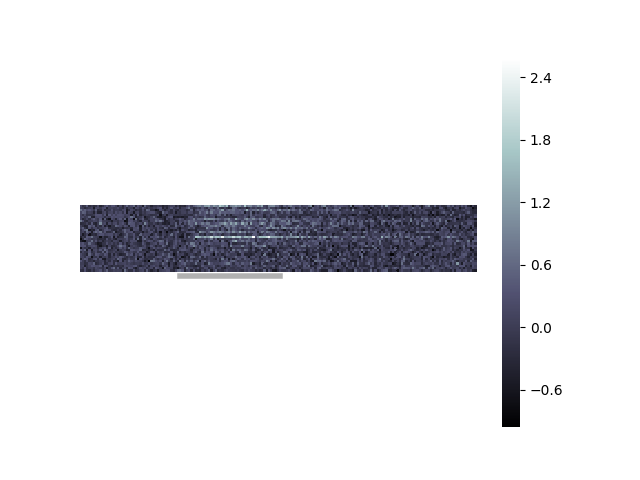

In [78]:
fig, ax = pl.subplots()
sns.heatmap(trialmats['config006'], cmap='bone')
ax.axis('equal')
ax.axis('off')
ax.plot([stim_on, stim_on+n_on], [ntrials+2, ntrials+2], lw=4, color='k', alpha=0.3)

# Get ALL condcorrs

In [13]:

responsive_test = 'ROC'
responsive_thr = 0.05
response_type = 'dff'

In [14]:
import cv2
from scipy.spatial.distance import pdist, squareform


In [15]:
from itertools import combinations

def get_corrcoefs(corrmat, metric='corrcoef'):
    n_list = np.arange(0, corrmat.shape[0])
    
    dataCorr = corrmat.copy()
    dataCorr = dataCorr.stack().reset_index()
    dataCorr = dataCorr[dataCorr['level_0'] != dataCorr['level_1']]

    # filtering out lower/upper triangular duplicates 
    dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join( [str(i) for i in sorted([x['level_0'],x['level_1']])] ),axis=1)
    dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
    dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
    dataCorr[metric] = dataCorr[0].copy()
    dataCorr.drop([0], axis=1, inplace=True)

    n_expected=len([",".join(map(str, comb)) for comb in combinations(n_list, 2)])
    assert len(dataCorr) == n_expected
    
    return dataCorr

In [16]:
def get_pairwise_corrs_by_trial(roidf):
    rawvals = np.vstack([traces[rid][tg.index] for trial, tg in roidf.groupby(['trial'])])
    indices = [trial for trial, tg in g.groupby(['trial'])]
    cpairs =get_corrcoefs(pd.DataFrame(rawvals, index=indices).dropna().T.corr(), metric='corrcoef')
    cpairs['config'] = [roidf['config'].unique()[0] for _ in np.range(len(indices))]
    
    return cpairs

In [20]:
# traces['config'] = labels['config'].copy()
# traces['trial'] = labels['trial'].copy()

# Separate timecoures by condition
Creates ntrials x nframes_per_trial mat


In [18]:
stats_str='%s-%s_%s-%.2f' % (traceid, response_type, responsive_test, responsive_thr)
pw_trialcorrs_dfile = os.path.join(aggregate_dir, 'variability', 'pw-tcourse-by-cfg-corrs_%s.pkl' % stats_str)

do_pw = False
if os.path.exists(pw_trialcorrs_dfile):
    print('hi')
    with open(pw_trialcorrs_dfile, 'rb') as f:
        pw_trialcorrs = pkl.load(f)
else:
    do_pw = True
    

hi


In [ ]:
# Separate timecoures by condition
# Creates ntrials x nframes_per_trial mat

if do_pw:
    pw_trialcorrs = []
    #cond_corrs=[]
    for (visual_area, animalid, session, fovnum), tmpdf in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
        datakey = '%s_%s_fov%i' % (session, animalid, fovnum)

        if '%s_%s' % (session, animalid) in always_exclude:
            continue

        # Load traces of responsive cells
        traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, traceid=traceid, response_type=response_type,
                                            responsive_test=responsive_test, responsive_thr=responsive_thr)

        s_on = labels['stim_on_frame'].unique()[0]
        n_on = labels['nframes_on'].unique()[0]

        for rid in traces.columns.tolist():
            for cfg, g in labels.groupby(['config']):
                # Get neuron's timecourse correlations bw all pairs of trials, grouped by condition
                corrs = get_corrcoefs(pd.DataFrame(np.vstack([traces[rid][tg.index[s_on:s_on+n_on]]\
                                                            for trial, tg in g.groupby(['trial'])]),\
                                                            index=[trial for trial, tg in g.groupby(['trial'])]).dropna().T.corr(), \
                                                           metric='corrcoef')
                corrs['config'] = [cfg for _ in np.arange(0, len(corrs))]
                corrs['rid'] = [rid for _ in np.arange(0, len(corrs))]
                corrs['visual_area'] = [visual_area for _ in np.arange(0, len(corrs))]
                corrs['datakey'] = [datakey for _ in np.arange(0, len(corrs))]

                pw_trialcorrs.append(corrs)

    # cond_corrs = pd.concat(cond_corrs, axis=0)
    pw_trialcorrs = pd.concat(pw_trialcorrs, axis=0)


    stats_str='%s-%s_%s-%.2f' % (traceid, response_type, responsive_test, responsive_thr)
    pw_trialcorrs_dfile = os.path.join(aggregate_dir, 'variability', 'pw-tcourse-by-cfg-corrs_%s.pkl' % stats_str)

    with open(os.path.join(pw_trialcorrs_dfile), 'wb') as f:
        pkl.dump(pw_trialcorrs, f, protocol=pkl.HIGHEST_PROTOCOL)

    print(pw_trialcorrs_dfile)

... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_66b289_traces001_e95cc2_traces001_b96bf7_traces001_9cb69c_traces001_3485a6_traces001_7be2ae/data_arrays/np_subtracted.npz
NP_subtracted offset was: 179.98
adding NP offset... (NP baseline offset: 877.52)
((249000, 331), (331,), ())
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC076/20190422/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_66b289_traces001_e95cc2_traces001_b96bf7_traces001_9cb69c_traces001_3485a6_traces001_7be2ae/summary_stats/ROC/roc_results.pkl']
... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blo

In [21]:
pw_trialcorrs.head()

level_0     level_1  corrcoef     config  rid
1  trial00024  trial00063 -0.192033  config001    3
2  trial00024  trial00138  0.001858  config001    3
3  trial00024  trial00180 -0.074922  config001    3
4  trial00024  trial00221 -0.317171  config001    3
5  trial00024  trial00278 -0.213162  config001    3

In [22]:
pw_trialcorrs.groupby(['visual_area', 'datakey']).count()

KeyError: 'visual_area'

In [85]:
#### Get mean across conditions 
avg_corrs = []
for (visual_area, datakey), g in cond_corrs.groupby(['visual_area', 'datakey']):
    
    roi_mean = g.groupby(['rid'])['ucorr'].mean()
    roi_std= g.groupby(['rid'])['ucorr'].std()
    roi_sem = g.groupby(['rid'])['ucorr'].apply(spstats.sem)
    roi_max = g.groupby(['rid'])['ucorr'].max()
    
    avg_corrs.append(pd.DataFrame({'meancorr': roi_mean,
                                   'stdcorr': roi_std,
                                   'semcorr': roi_sem,
                                   'maxcorr': roi_max,
                                   'visual_area': [visual_area for _ in np.arange(0, len(roi_mean))],
                                   'datakey': [datakey for _ in np.arange(0, len(roi_mean))]}))
    
avgcorrs = pd.concat(avg_corrs, axis=0)

In [86]:
avgcorrs.head()

datakey   maxcorr  meancorr   semcorr   stdcorr visual_area
rid                                                                         
5    20190422_JC076_fov1  0.424294  0.123824  0.012795  0.090475          Li
32   20190422_JC076_fov1  0.126544  0.013980  0.003601  0.025459          Li
34   20190422_JC076_fov1  0.038729  0.007368  0.001311  0.009268          Li
41   20190422_JC076_fov1  0.029838  0.005946  0.000986  0.006970          Li
47   20190422_JC076_fov1  0.016290  0.001862  0.000650  0.004593          Li

In [38]:
visual_areas = ['V1', 'Lm', 'Li']
color_list = ['blue', 'purple', 'darkorange']
area_colors = dict((v, c) for v, c in zip(visual_areas, color_list))

In [84]:
avgcorrs.groupby(['visual_area', 'datakey']).mean()

meancorr   semcorr   stdcorr
visual_area datakey                                          
Li          20190422_JC076_fov1  0.021382  0.002677  0.018928
            20190502_JC076_fov1  0.023726  0.002673  0.018904
            20190602_JC091_fov1  0.016611  0.002178  0.015403
            20190605_JC090_fov1  0.009431  0.001867  0.013199
            20190606_JC091_fov1  0.010364  0.001854  0.013109
            20190607_JC091_fov1  0.010494  0.001622  0.011473
            20190609_JC099_fov1  0.004296  0.000973  0.006881
            20190612_JC099_fov1  0.008925  0.001388  0.009815
            20190614_JC091_fov1  0.007638  0.001557  0.011012
            20190617_JC099_fov1  0.013753  0.002194  0.015512
            20191008_JC091_fov1  0.003477  0.000581  0.004109
            20191018_JC113_fov1  0.005392  0.000638  0.004514
            20191105_JC117_fov1  0.046948  0.005257  0.037174
            20191111_JC120_fov1  0.005320  0.001430  0.010109
Lm          20190430_JC078_fov1  0.011924  0.002286  0.016165
            20190504_JC078_fov1  0.020054  0.003188  0.022541
            20190506_JC080_fov1  0.019447  0.002680  0.018950
            20190508_JC083_fov1  0.020807  0.002415  0.017074
            20190509_JC078_fov1  0.020358  0.003232  0.022853
            20190512_JC083_fov1  0.015933  0.002250  0.015912
            20190513_JC078_fov1  0.006129  0.001449  0.010246
            20190517_JC083_fov1  0.010881  0.001697  0.011996
            20190525_JC084_fov1  0.020247  0.003326  0.023515
            20190603_JC080_fov1  0.017329  0.002349  0.016609
            20190627_JC091_fov1  0.009543  0.002662  0.018820
V1          20190420_JC076_fov1  0.017816  0.002461  0.017402
            20190501_JC076_fov1  0.026951  0.003476  0.024581
            20190507_JC083_fov1  0.039312  0.004546  0.032142
            20190510_JC083_fov1  0.026370  0.003466  0.024512
            20190511_JC083_fov1  0.030639  0.003542  0.025045
            20190522_JC084_fov1  0.027234  0.003366  0.023805
            20190613_JC097_fov1  0.019729  0.002910  0.020577
            20190616_JC097_fov1  0.018157  0.002564  0.018132
            20190617_JC097_fov1  0.018355  0.002655  0.018775
            20190622_JC085_fov1  0.011821  0.001790  0.012659
            20191006_JC110_fov1  0.014378  0.001958  0.013845

<IPython.core.display.Javascript object>


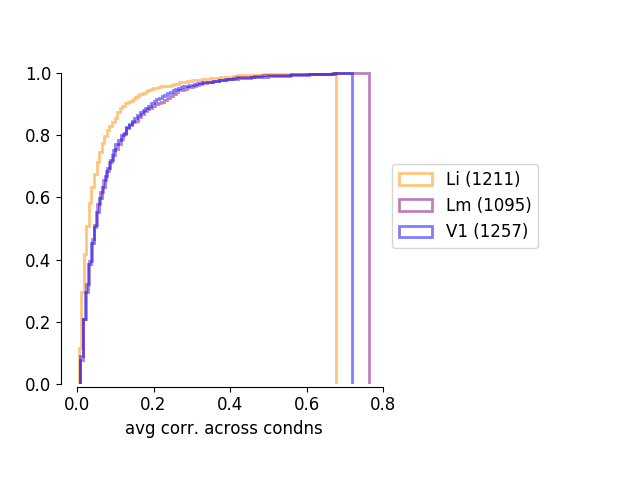

avg-timecourse_maxcorrs-across-condition_per-roi


In [94]:
cdf=True

metric = 'maxcorr'

fig, ax = pl.subplots()
for visual_area, g in avgcorrs.groupby(['visual_area']):
    values = abs(g[metric].values)
    weights = np.ones_like(values)/float(len(values))
    ax.hist(values, 
            cumulative=cdf,
            label='%s (%i)' % (visual_area, len(values)),
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=2,
            normed=0, weights=weights, bins=100)
    ax.set_xlabel('avg corr. across condns', fontsize=12)
    ax.tick_params(labelsize=12)
ax.legend(bbox_to_anchor=(1.0, 0.7), fontsize=12)
pl.subplots_adjust(left=0.1, right=0.6, bottom=0.2)

sns.despine(trim=True, offset=2)

figname = 'avg-timecourse_%ss-across-condition_per-roi' % metric
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.svg' % figname))
print(figname)

In [22]:
sizes = sorted(sdf['size'].unique())
morphlevels = sorted(sdf['morphlevel'].unique())
np.reshape(sdf.index.tolist(), (len(morphlevels), len(sizes)))

array([['config001', 'config002', 'config003', 'config004', 'config005'],
       ['config006', 'config007', 'config008', 'config009', 'config010'],
       ['config011', 'config012', 'config013', 'config014', 'config015'],
       ['config016', 'config017', 'config018', 'config019', 'config020'],
       ['config021', 'config022', 'config023', 'config024', 'config025'],
       ['config026', 'config027', 'config028', 'config029', 'config030'],
       ['config031', 'config032', 'config033', 'config034', 'config035'],
       ['config036', 'config037', 'config038', 'config039', 'config040'],
       ['config041', 'config042', 'config043', 'config044', 'config045'],
       ['config046', 'config047', 'config048', 'config049', 'config050']],
      dtype='|S9')

<IPython.core.display.Javascript object>


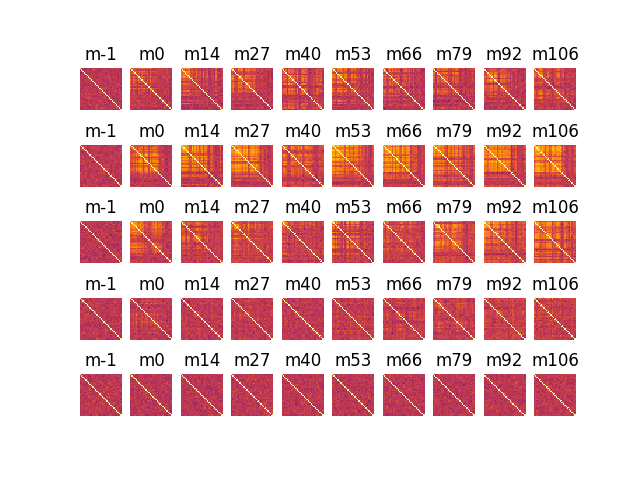

In [52]:
cmap = 'inferno'
nr = len(sizes)
nc = len(morphlevels)
fig, axes = pl.subplots(nr, nc)
for ri, sz in enumerate(sizes):
    for ci, ml in enumerate(morphlevels):
        ax = axes[ri, ci]
        currcfg = sdf[(sdf['size']==sz) & (sdf['morphlevel']==ml)].index.tolist()[0]
        sns.heatmap(pw_trial_corrs[currcfg], ax=ax, vmin=-1, vmax=1, cmap=cmap, cbar=0)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title('m%i' % ml)
        if ci==0:
            ax.set_ylabel('sz %i' % sz)
        

# Variability vs spatial distance

In [23]:
#### Get position info for rois (all fovs)
# NOTE:  ap_pos and ml_pos are w.r.t to the acquired FOV, not transformed to animal's AP/ML

pos_fpath = glob.glob(os.path.join(aggregate_dir, 'roi_positions.pkl'))[0]
with open(pos_fpath, 'rb') as f:
    fovinfo = pkl.load(f)
posdf = fovinfo['positions']
fovinfo.keys()

['positions', 'ap_lim', 'ml_lim', 'dims']

In [24]:
fovinfo

{'ap_lim': 1183.7439999999999,
 'dims': (512, 512),
 'ml_lim': 974.84799999999996,
 'positions':        index      ap_pos      ml_pos visual_area animalid   session  \
 0          0  134.358419  961.493918          Li    JC076  20190422   
 1          1   71.812258  938.601205          Li    JC076  20190422   
 2          2   60.229636  930.970301          Li    JC076  20190422   
 3          3  141.307992  938.601205          Li    JC076  20190422   
 4          4  213.120250  944.324384          Li    JC076  20190422   
 5          5  141.307992  837.491726          Li    JC076  20190422   
 6          6   92.660978  749.736329          Li    JC076  20190422   
 7          7  106.560125  759.274959          Li    JC076  20190422   
 8          8  106.560125  780.259945          Li    JC076  20190422   
 9          9  104.243601  793.614027          Li    JC076  20190422   
 10        10  120.459272  671.519562          Li    JC076  20190422   
 11        11   83.394881  620.010959   

## Extract timecourse corrs and distances for all datasets of current experiment type

In [28]:
variability_dir = os.path.join(aggregate_dir, 'variability')
stats_str = '%s-%s_%s-%.2f' % (traceid, response_type, responsive_test, responsive_thr)
print(stats_str)
pairwise_metrics_dfile = os.path.join(variability_dir, 'pairwise-metrics_%s.pkl' % stats_str)

if os.path.exists(pairwise_metrics_dfile):
    with open(pairwise_metrics_dfile, 'rb') as f:
        pairwise_df = pkl.load(f)
    load_pw = False
else:
    load_pw = True
print(load_pw)
print(pairwise_metrics_dfile)

traces001-dff_ROC-0.05
False
/n/coxfs01/julianarhee/aggregate-visual-areas/variability/pairwise-metrics_traces001-dff_ROC-0.05.pkl


In [27]:
if not os.path.exists(os.path.join(variability_dir, 'signal-correlations')):
    os.makedirs(os.path.join(variability_dir, 'signal-correlations'))
if not os.path.exists(os.path.join(variability_dir, 'spatial-distance')):
    os.makedirs(os.path.join(variability_dir, 'spatial-distance'))
    

In [101]:
if load_pw:
    pairwise_df=[]
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
        if '%s_%s' % (session, animalid) in always_exclude:
            continue

        datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
        fov = 'FOV%i_zoom2p0x' % fovnum

        # Load traces of responsive cells
        traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, traceid=traceid, response_type=response_type,
                                            responsive_test=responsive_test, responsive_thr=responsive_thr)
        roi_list = traces.columns.tolist()
        rpositions = posdf.groupby(['animalid', 'session', 'fov']).get_group((animalid, session, fov))[['index', 'ap_pos', 'ml_pos']]

        # Calculate pairwise correlations of time courses
        tracecorr = traces.corr()

        # Calculate pairwise distances
        rpos = rpositions[rpositions['index'].isin(roi_list)]
        pwdists = pdist(rpos[['ml_pos', 'ap_pos']], metric='euclidean')
        dist_matrix = pd.DataFrame(squareform(pwdists), index=roi_list, columns=roi_list)


        # Get combos
        pairwise_trace_coefs = get_corrcoefs(tracecorr, metric='corrcoef')
        pairwise_distances = get_corrcoefs(dist_matrix, 'distance')
        roi_pairs = pd.merge(pairwise_trace_coefs, pairwise_distances)
        n_samples = roi_pairs.shape[0]
        roi_pairs['visual_area'] = [visual_area for _ in np.arange(0, n_samples)]
        roi_pairs['datakey'] = [datakey for _ in np.arange(0, n_samples)]

        pairwise_df.append(roi_pairs)

    pairwise_df = pd.concat(pairwise_df, axis=0)

    #### Save

    with open(pairwise_metrics_dfile, 'wb') as f:
        pkl.dump(pairwise_df, f, protocol=pkl.HIGHEST_PROTOCOL)
    print(pairwise_metrics_dfile)

In [129]:
session = '20190522'
animalid = 'JC084'
fovnum = 1

In [130]:
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    fov = 'FOV%i_zoom2p0x' % fovnum

    # Load traces of responsive cells
    traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, traceid=traceid, response_type=response_type,
                                        responsive_test=responsive_test, responsive_thr=responsive_thr)
    roi_list = traces.columns.tolist()
    rpositions = posdf.groupby(['animalid', 'session', 'fov']).get_group((animalid, session, fov))[['index', 'ap_pos', 'ml_pos']]

    # Calculate pairwise correlations of time courses
    tracecorr = traces.corr()


... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... loading data array
/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_ea0b53_traces001_92d492_traces001_af4cfd_traces001_9188fa_traces001_b44714_traces001_133108/data_arrays/np_subtracted.npz
NP_subtracted offset was: 87.95
adding NP offset... (NP baseline offset: 588.05)
((268500, 260), (260,), ())
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_ea0b53_traces001_92d492_traces001_af4cfd_traces001_9188fa_traces001_b44714_traces001_133108/summary_stats/ROC/roc_results.pkl']


In [102]:
#### Save
curr_outdir = os.path.join(aggregate_dir, 'variability')
stats_str = '%s-%s_%s-%.2f' % (traceid, response_type, responsive_test, responsive_thr)
print(stats_str)
pairwise_metrics_dfile = os.path.join(curr_outdir, 'pairwise-metrics_%s.pkl' % stats_str)
with open(pairwise_metrics_dfile, 'wb') as f:
    pkl.dump(pairwise_df, f, protocol=pkl.HIGHEST_PROTOCOL)
print(pairwise_metrics_dfile)


traces001-dff_ROC-0.05
/n/coxfs01/julianarhee/aggregate-visual-areas/variability/pairwise-metrics_traces001-dff_ROC-0.05.pkl


# Plot

In [29]:
import scikit_posthocs as sp
import statsmodels.stats.multicomp as ml


In [30]:
def calculate_stats_by_area(mdf, metric='MI', palette='colorblind', alpha=0.7) :

    g= sns.catplot(x='visual_area', y=metric, kind='bar', data=mdf, palette=palette,
               order=['V1', 'Lm', 'Li'], alpha=alpha)

    
    c1 = mdf[mdf['visual_area']=='V1'][metric]
    c2 = mdf[mdf['visual_area']=='Lm'][metric]
    c3 = mdf[mdf['visual_area']=='Li'][metric]
    print(c1.shape, c2.shape, c3.shape)

    # Shapiro-Wilk normality test 
    print("Shapiro-Wilk normality:", spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) )

    F, p = spstats.f_oneway(c1, c2, c3)
    print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

    scores = np.hstack([c1, c2, c3])
    groups = np.hstack([['V1' for _ in range(len(c1))], 
                       ['Lm' for _ in range(len(c2))],
                       ['Li' for _ in range(len(c3))]])
    # Note that data in sheet have been preformatted in Group and Score columns 
    # Boolean values refer to whether we should reject the null hypothesis (H0) that
    # the means of the tested pair are statistically similar (non-significant differences)
    mcobj = ml.MultiComparison(scores, groups)
    out = mcobj.tukeyhsd(0.05) 
    print(out)

    print(spstats.kruskal(c1, c2, c3))
    statsdf = mdf[['visual_area', metric]].copy()
    print(sp.posthoc_dunn(statsdf, val_col=metric, group_col='visual_area', p_adjust='bonferroni')) #'fdr_by')
    
    return g

In [31]:
visual_areas = ['V1', 'Lm', 'Li']
color_list = ['navy', 'darkmagenta', 'darkorange']
area_colors = dict((v, c) for v, c in zip(visual_areas, color_list))

## Distribution of pairwise CCs and distance

<IPython.core.display.Javascript object>


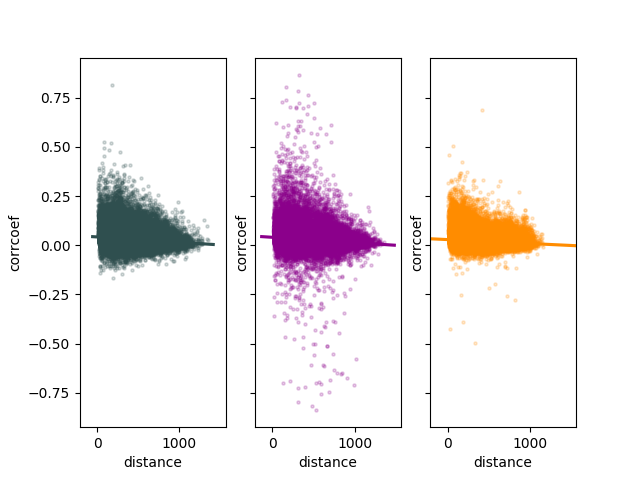

In [32]:
fig, axes = pl.subplots(1, 3, sharex=True, sharey=True)
ai = 0
for visual_area in visual_areas:
    g = pairwise_df[pairwise_df['visual_area']==visual_area]
    ax=axes[ai]
    #ax.scatter(g['distance'], g['corrcoef'], color=area_colors[visual_area], alpha=0.5, marker='+', s=5)
    sns.regplot('distance', 'corrcoef', data=g,
                color=area_colors[visual_area], ax=ax,
               scatter_kws = {'marker':'+', 's': 5, 'alpha': 0.2}) #, alpha=0.5) #, marker='+', s=5)

    ai += 1

In [259]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state'

#### joint plot

<IPython.core.display.Javascript object>


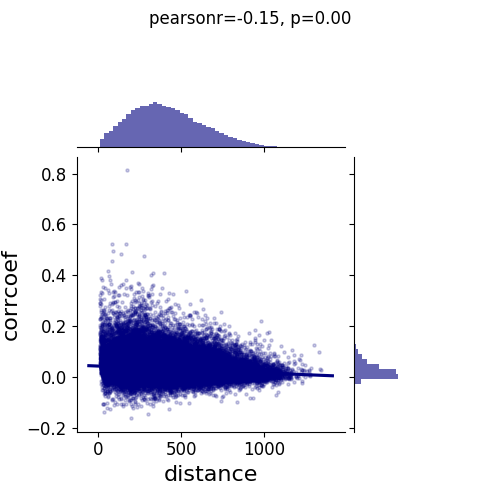

<IPython.core.display.Javascript object>


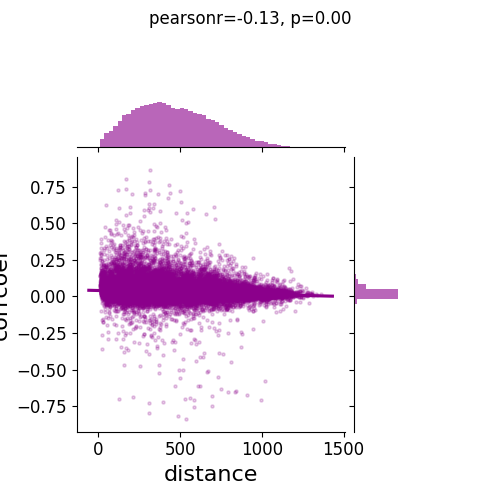

<IPython.core.display.Javascript object>


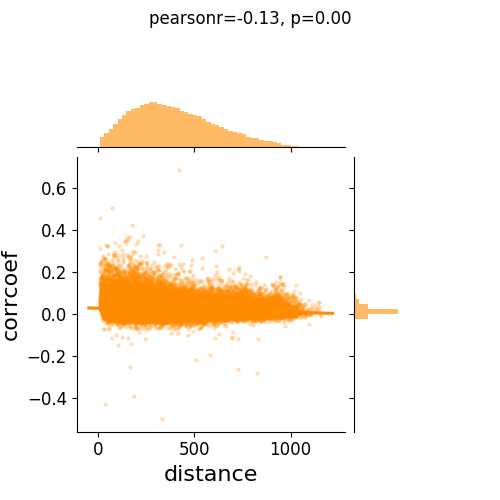

In [435]:
pl.rcParams["axes.labelsize"] = 16
pl.rcParams["xtick.labelsize"] = 12
pl.rcParams["ytick.labelsize"] = 12

for visual_area in visual_areas:

    currdf= pairwise_df[pairwise_df['visual_area']==visual_area]
    pg = sns.JointGrid(x="distance", y="corrcoef", data=currdf, height=5)
    pg = pg.plot_joint(sns.regplot, color=area_colors[visual_area],
                      scatter_kws={'s':5, 'alpha': 0.2, 'marker': '+'})
    #sns.despine(offset=4)

    _ = pg.ax_marg_x.hist(currdf['distance'], color=area_colors[visual_area], alpha=.6, bins=50)
    #                      bins=np.arange(0, 60, 5))
    _ = pg.ax_marg_y.hist(currdf['corrcoef'], color=area_colors[visual_area], alpha=.6,
                         orientation="horizontal", bins=50),
    #                      bins=np.arange(0, 12, 1)

    pl.subplots_adjust(top=0.8, right=0.8)
    r, p = spstats.pearsonr(currdf['distance'], currdf['corrcoef'])
    pg.fig.suptitle('pearsonr=%.2f, p=%.2f' % (r,p))

    figname = 'pairwise-dists-v-timecourseCC_%s' % visual_area

    pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))

In [32]:
visual_areas = ['V1', 'Lm', 'Li']
color_list = ['navy', 'darkmagenta', 'darkorange']
area_colors = dict((v, c) for v, c in zip(visual_areas, color_list))

<IPython.core.display.Javascript object>


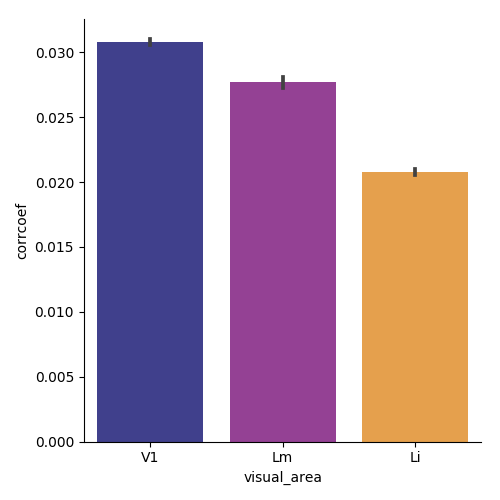

((88568,), (56964,), (65820,))
('Shapiro-Wilk normality:', (0.8468328714370728, 0.0), (0.6776201725006104, 0.0), (0.7619144916534424, 0.0))
F statistic = 1133.330 and probability p = 0.000
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  Li     Lm    0.0069  0.0064 0.0075  True 
  Li     V1     0.01   0.0095 0.0105  True 
  Lm     V1    0.0031  0.0026 0.0036  True 
-------------------------------------------
KruskalResult(statistic=4566.7457549178507, pvalue=0.0)


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


     Li            Lm            V1
Li -1.0  0.000000e+00  0.000000e+00
Lm  0.0 -1.000000e+00  1.868623e-86
V1  0.0  1.868623e-86 -1.000000e+00


In [33]:

g = calculate_stats_by_area(pairwise_df, metric='corrcoef', 
                            palette=area_colors, alpha=0.8)

figname = '_pairwise-tcourse-corrs_collapse-sessions'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s_col.svg' % figname))

## Bin distances and look at timecourse corrs vs. distances

In [41]:
n_bins = 20

#pairwise_df['binned_dist'] = pd.cut(pairwise_df['distance'], n_bins, labels=False)
pairwise_df['binned_dist'] = pd.qcut(pairwise_df['distance'], n_bins, labels=False)
_, bin_sizes = pd.qcut(pairwise_df['distance'], n_bins, retbins=True)
bin_edges = bin_sizes[0:-1]


<IPython.core.display.Javascript object>


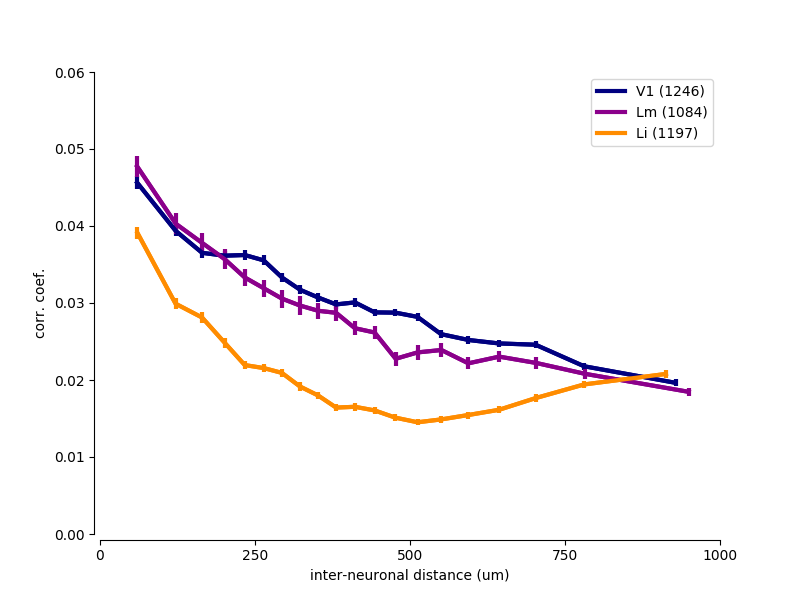

In [43]:

fig, ax = pl.subplots(figsize=(8,6))

for visual_area in visual_areas:
    currdf = pairwise_df[pairwise_df['visual_area']==visual_area]
    ncells_t = sum([len(g['level_0'].unique()) for dk, g in currdf.groupby(['datakey'])])

    
    binned_ = [(vals['distance'].mean(), vals['corrcoef'].mean(), spstats.sem(vals['corrcoef']) )\
               for b, vals in currdf.groupby(['binned_dist'])]
    
    #avg_dist = [vals['distance'].mean() for b, vals in currdf.groupby(['binned_dist'])]
    
    bin_names = [b[0] for b in binned_]
    bin_ccs = [b[1] for b in binned_]
    bin_sems = [b[2] for b in binned_]
    ax.plot(bin_names, bin_ccs, color=area_colors[visual_area], 
           label='%s (%i)' % (visual_area, ncells_t), lw=3)
    ax.errorbar(bin_names, bin_ccs, yerr=bin_sems, color=area_colors[visual_area], lw=3)
    
    xticks = np.linspace(0, 1000, 5)
    ax.set_xticks(xticks)
    ax.set_xticklabels([int(b) for b in xticks])
    ax.set_xlabel('inter-neuronal distance (um)')
    ax.set_ylabel('corr. coef.')
ax.set_ylim([0, 0.06])
sns.despine(trim=True, offset=4)
ax.legend(bbox_to_anchor=(1., 1))

figname = 'pairwise-distances_pairwise-tcourse-corrs_quartile-binned'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.png' % figname))

## Compare average timecourse correlations by visual area

<IPython.core.display.Javascript object>


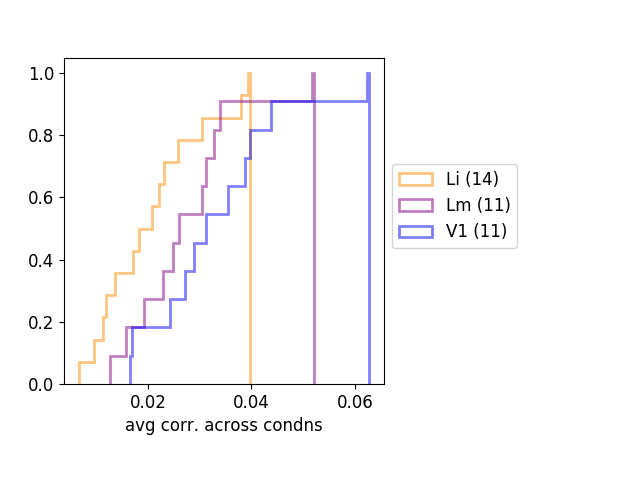

In [289]:
cdf = True
metric = 'corrcoef'

fig, ax = pl.subplots()
for visual_area, g in pairwise_df.groupby(['visual_area']):
    values = g.groupby(['datakey'])[metric].mean()
    
    #values = abs(g[metric].values)
    weights = np.ones_like(values)/float(len(values))
    ax.hist(values, 
            cumulative=cdf,
            label='%s (%i)' % (visual_area, len(values)),
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=2,
            normed=0, weights=weights, bins=100)
    ax.set_xlabel('avg corr. across condns', fontsize=12)
    ax.tick_params(labelsize=12)
ax.legend(bbox_to_anchor=(1.0, 0.7), fontsize=12)
pl.subplots_adjust(left=0.1, right=0.6, bottom=0.2)

#sns.despine(trim=True, offset=2)



In [107]:
mean_pwcorrs = []
for visual_area, g in pairwise_df.groupby(['visual_area']):
    mean_corrcoefs = g.groupby(['datakey'])['corrcoef'].mean()
    
    mean_pwcorrs.append( pd.DataFrame({'mean_corrcoefs': mean_corrcoefs.values,
                        'visual_area': [visual_area for _ in np.arange(0, len(mean_corrcoefs))]}) )
mean_pwcorrs = pd.concat(mean_pwcorrs, axis=0)

<IPython.core.display.Javascript object>


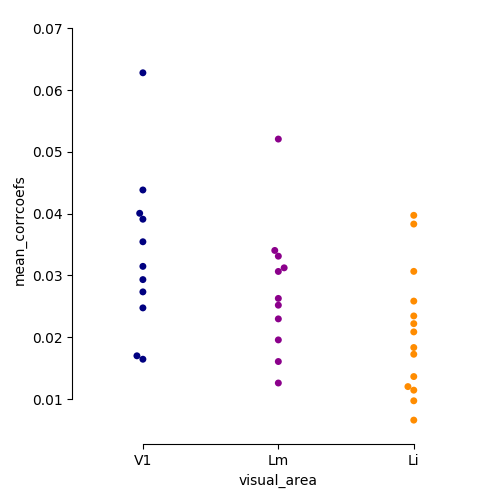

In [108]:
cdf = True
metric = 'corrcoef'


sns.catplot(x='visual_area', y='mean_corrcoefs', data=mean_pwcorrs, order=visual_areas,
            palette=area_colors, kind='swarm')
    
#pl.legend(bbox_to_anchor=(1.0, 0.7), fontsize=12)
#pl.subplots_adjust(left=0.2, right=0.6, bottom=0.2)

sns.despine(trim=True, offset=2)



<IPython.core.display.Javascript object>


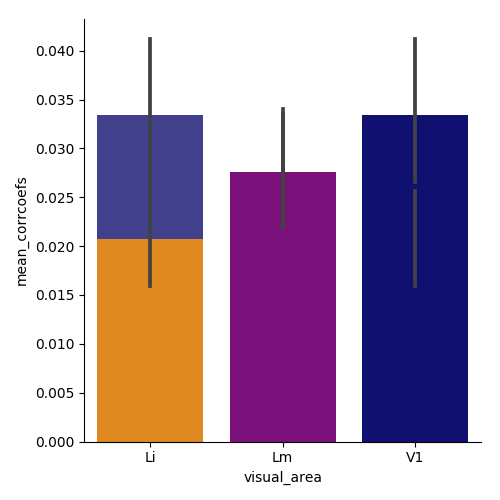

((11,), (11,), (14,))
('Shapiro-Wilk normality:', (0.9379521608352661, 0.49673154950141907), (0.9336099624633789, 0.4485156238079071), (0.9422619342803955, 0.4480741024017334))
F statistic = 3.913 and probability p = 0.030
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    0.0069  -0.0043 0.0181 False 
  Li     V1    0.0127   0.0015 0.0239  True 
  Lm     V1    0.0058  -0.0061 0.0177 False 
--------------------------------------------
KruskalResult(statistic=6.8313443313443258, pvalue=0.032854315734731125)
          Li        Lm        V1
Li -1.000000  0.407519  0.029326
Lm  0.407519 -1.000000  0.906157
V1  0.029326  0.906157 -1.000000


In [109]:

g = calculate_stats_by_area(mean_pwcorrs, metric='mean_corrcoefs', 
                            palette=area_colors, alpha=0.8)

figname = 'pairwise-tcourse-corrs_mean-within-session'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))

<IPython.core.display.Javascript object>


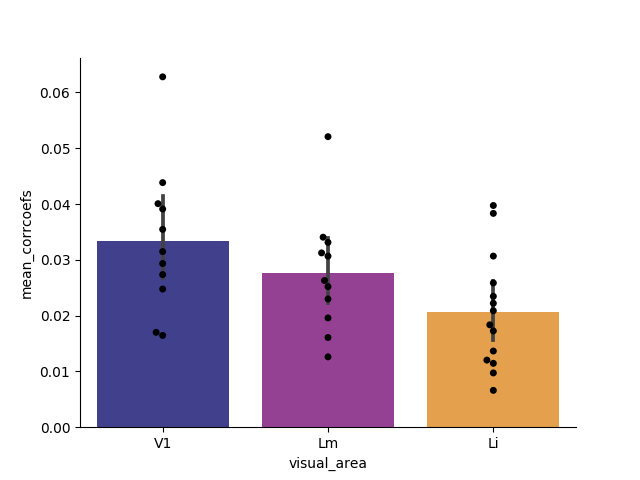

In [119]:
fig, ax = pl.subplots()

sns.barplot(x='visual_area', y='mean_corrcoefs', data=mean_pwcorrs, palette=area_colors, order=visual_areas, alpha=0.8)

sns.swarmplot(x='visual_area', y='mean_corrcoefs', data=mean_pwcorrs, color='k', order=visual_areas)

sns.despine()

figname = 'pairwise-tcourse-corrs_mean-within-session'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))

## Compare ROI pw corrs by condition type (average traces and look at MEAN by condition)
On average, do cells that are closer together share similar stimulus tuning profiles?

In [120]:
data_dir = os.path.join(aggregate_dir, 'data-stats')
os.listdir(data_dir)

load_data = False
blobsdata_outfile = os.path.join(data_dir, 'blobs_%s-%s_%s-thr-%.2f.pkl' % (traceid, response_type, responsive_test, responsive_thr))
print(blobsdata_outfile)
if os.path.exists(blobsdata_outfile):
    print("...loading data")
    with open(blobsdata_outfile, 'rb') as f:
        NEURALDATA = pkl.load(f)
else:
    load_data = True


/n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/blobs_traces001-dff_ROC-thr-0.05.pkl
...loading data


In [126]:
NEURALDATA[datakey]['data'].shape

(1675, 105)

In [121]:
pw_condcorrs_df=[]
for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    if '%s_%s' % (session, animalid) in always_exclude:
        continue
        
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    fov = 'FOV%i_zoom2p0x' % fovnum

    corrmat = NEURALDATA[datakey]['data'].groupby(['config']).mean().corr()
    
    # Get combos
    pw_condcorrs = get_corrcoefs(corrmat, metric='cond_corrcoef')
    n_samples = pw_condcorrs.shape[0]
    pw_condcorrs['visual_area'] = [visual_area for _ in np.arange(0, n_samples)]
    pw_condcorrs['datakey'] = [datakey for _ in np.arange(0, n_samples)]

    pw_condcorrs_df.append(pw_condcorrs)

pw_condcorrs_df = pd.concat(pw_condcorrs_df, axis=0)

#### Save
curr_outdir = os.path.join(aggregate_dir, 'variability')
stats_str = '%s-%s_%s-%.2f' % (traceid, response_type, responsive_test, responsive_thr)
print(stats_str)
pairwise_condcorrs_dfile = os.path.join(curr_outdir, 'pairwise-cond-corrs_%s.pkl' % stats_str)
with open(pairwise_condcorrs_dfile, 'wb') as f:
    pkl.dump(pw_condcorrs_df, f, protocol=pkl.HIGHEST_PROTOCOL)
print(pairwise_condcorrs_dfile)


traces001-dff_ROC-0.05
/n/coxfs01/julianarhee/aggregate-visual-areas/variability/pairwise-cond-corrs_traces001-dff_ROC-0.05.pkl


<IPython.core.display.Javascript object>


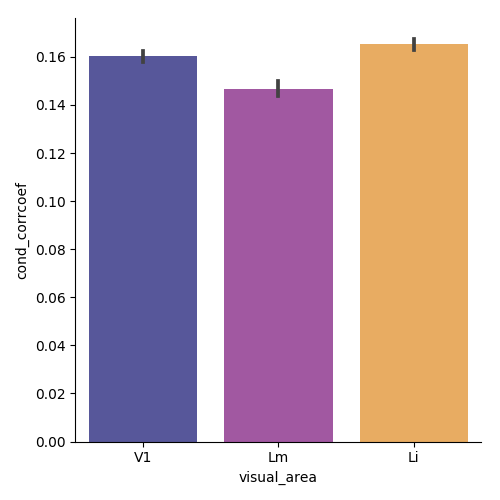

((88568,), (56964,), (65820,))
('Shapiro-Wilk normality:', (0.9865782856941223, 0.0), (0.9918489456176758, 0.0), (0.994383692741394, 7.466118217922625e-42))
F statistic = 47.814 and probability p = 0.000
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm   -0.0184  -0.0229 -0.0138  True 
  Li     V1   -0.0049   -0.009 -0.0008  True 
  Lm     V1    0.0135   0.0092  0.0178  True 
---------------------------------------------
KruskalResult(statistic=107.04374040057883, pvalue=5.6983236299035162e-24)
              Li            Lm            V1
Li -1.000000e+00  1.147002e-16  1.000000e+00
Lm  1.147002e-16 -1.000000e+00  5.792528e-22
V1  1.000000e+00  5.792528e-22 -1.000000e+00
pairwise-condition-corrs_collapse-sessions


In [122]:
g = calculate_stats_by_area(pw_condcorrs_df, metric='cond_corrcoef', 
                            palette=area_colors, alpha=0.7)

figname = 'pairwise-condition-corrs_collapse-sessions'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))
print(figname)

In [124]:
mean_condcorrs = []
for visual_area, g in pw_condcorrs_df.groupby(['visual_area']):
    mean_ccs = g.groupby(['datakey'])['cond_corrcoef'].mean()
    
    mean_condcorrs.append( pd.DataFrame({'mean_condcoefs': mean_ccs.values,
                        'visual_area': [visual_area for _ in np.arange(0, len(mean_ccs))]}) )
mean_condcorrs = pd.concat(mean_condcorrs, axis=0)

<IPython.core.display.Javascript object>


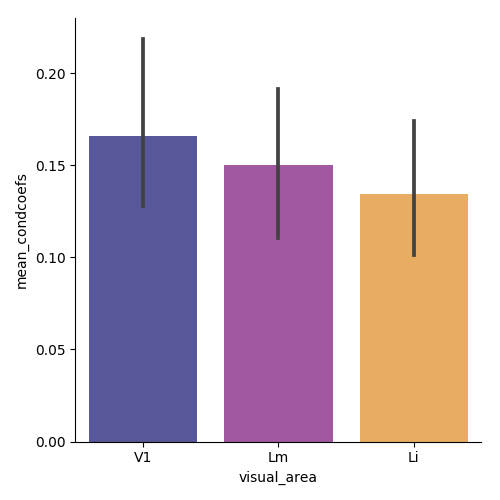

((11,), (11,), (14,))
('Shapiro-Wilk normality:', (0.7652797102928162, 0.0032921910751610994), (0.9442870616912842, 0.5721264481544495), (0.8611780405044556, 0.03161029517650604))
F statistic = 0.595 and probability p = 0.557
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    0.016   -0.0552 0.0872 False 
  Li     V1    0.0316  -0.0396 0.1028 False 
  Lm     V1    0.0156  -0.0598 0.0909 False 
--------------------------------------------
KruskalResult(statistic=1.4338949338949192, pvalue=0.4882403533874774)
          Li   Lm        V1
Li -1.000000  1.0  0.711066
Lm  1.000000 -1.0  1.000000
V1  0.711066  1.0 -1.000000
pairwise-condition-corrs_mean-within-session


In [125]:
g = calculate_stats_by_area(mean_condcorrs, metric='mean_condcoefs', 
                            palette=area_colors, alpha=0.7)

figname = 'pairwise-condition-corrs_mean-within-session'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))
print(figname)

<IPython.core.display.Javascript object>


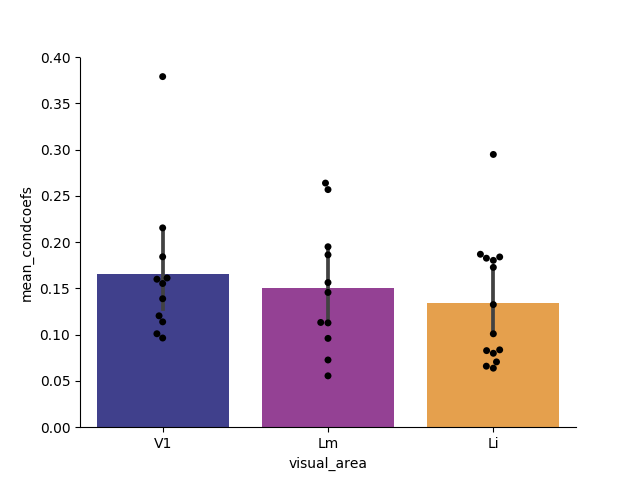

In [128]:
fig, ax = pl.subplots()

sns.barplot(x='visual_area', y='mean_condcoefs', data=mean_condcorrs, palette=area_colors, order=visual_areas, alpha=0.8)

sns.swarmplot(x='visual_area', y='mean_condcoefs', data=mean_condcorrs, color='k', order=visual_areas)

sns.despine()

figname = 'pairwise-condition-corrs_mean-within-session'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))

In [44]:
pairwise_df.head()

level_0  level_1  corrcoef    distance visual_area              datakey  \
0        5       32  0.205403  168.110069          Li  20190422_JC076_fov1   
1        5       34 -0.000704  230.478223          Li  20190422_JC076_fov1   
2        5       41  0.045117  217.247897          Li  20190422_JC076_fov1   
3        5       47 -0.010371  235.279708          Li  20190422_JC076_fov1   
4        5       60  0.069148  330.346825          Li  20190422_JC076_fov1   

   binned_dist  
0            2  
1            4  
2            3  
3            4  
4            7

## Fano

In [445]:
print(datakey)


20191006_JC110_fov1


In [62]:
variances = NEURALDATA[datakey]['data'].groupby(['config']).std()

In [94]:
variance_by_cond = []
for (v, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    if '%s_%s' % (session, animalid) in always_exclude:
        continue
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    
    stds = NEURALDATA[datakey]['data'].groupby(['config']).std().stack().values
    slabels= NEURALDATA[datakey]['data'].groupby(['config']).std().stack().index.tolist()

    variance_by_cond.append(pd.DataFrame({'variance': [s**2 for s in stds],
                                            'config': [s[0] for s in slabels],
                                            'rid': [s[1] for s in slabels],
                                         'visual_area': [v for _ in np.arange(0, len(stds))],
                                         'datakey': [datakey for _ in np.arange(0, len(stds))] }) )

variance_by_cond = pd.concat(variance_by_cond, axis=0)

<IPython.core.display.Javascript object>


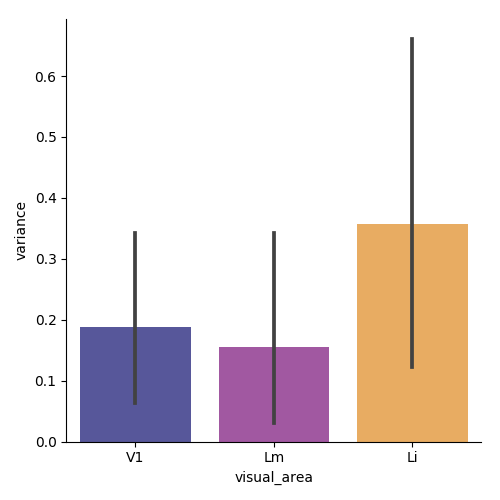

((62850,), (54750,), (60550,))
('Shapiro-Wilk normality:', (0.0014176368713378906, 0.0), (0.0008484721183776855, 0.0), (0.0015962719917297363, 0.0))
F statistic = 1.109 and probability p = 0.330
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    -0.201  -0.5461 0.1442 False 
  Li     V1   -0.1693  -0.5026 0.1639 False 
  Lm     V1    0.0316  -0.3105 0.3738 False 
--------------------------------------------
KruskalResult(statistic=14490.408483942621, pvalue=0.0)
     Li        Lm        V1
Li -1.0  0.000000  0.000000
Lm  0.0 -1.000000  0.131556
V1  0.0  0.131556 -1.000000
variance-within-condition_collapse-sessions


In [95]:
g = calculate_stats_by_area(variance_by_cond, metric='variance', 
                            palette=area_colors, alpha=0.7)

figname = 'variance-within-condition_collapse-sessions'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))
print(figname)

In [70]:
NEURALDATA[datakey]['data'].groupby(['config']).count()


3    4    5    6    7    8    11   16   24   33  ...   353  354  \
config                                                      ...              
config001   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config002   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config003   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config004   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config005   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config006   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config007   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config008   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config009   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config010   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config011   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config012   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config013   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config014   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config015   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config016   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config017   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config018   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config019   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config020   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config021   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config022   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config023   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config024   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config025   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config026   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config027   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config028   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config029   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config030   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config031   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config032   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config033   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config034   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config035   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config036   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config037   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config038   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config039   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config040   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config041   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config042   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config043   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config044   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config045   33   33   33   33   33   33   33   33   33   33 ...    33   33   
config046   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config047   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config048   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config049   34   34   34   34   34   34   34   34   34   34 ...    34   34   
config050   33   33   33   33   3

In [96]:
variance_by_area = []
for (v, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    if '%s_%s' % (session, animalid) in always_exclude:
        continue
    #if animalid == 'JC120':
    #    continue
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    
    stds = NEURALDATA[datakey]['data'].groupby(['config']).std().mean()
    rids = stds.index.tolist()

    variance_by_area.append(pd.DataFrame({'variance': [s**2 for s in stds],
                                            'rid': stds.index.tolist(),
                                         'visual_area': [v for _ in np.arange(0, len(stds))],
                                         'datakey': [datakey for _ in np.arange(0, len(stds))] }) )

variance_by_area = pd.concat(variance_by_area, axis=0)

<IPython.core.display.Javascript object>


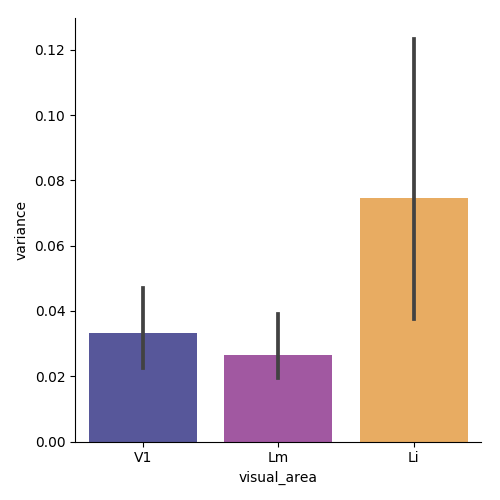

((1257,), (1095,), (1211,))
('Shapiro-Wilk normality:', (0.07442224025726318, 0.0), (0.06420016288757324, 0.0), (0.043949663639068604, 0.0))
F statistic = 3.489 and probability p = 0.031
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm   -0.0482  -0.0954 -0.0011  True 
  Li     V1   -0.0415   -0.087  0.004  False 
  Lm     V1    0.0068  -0.0399  0.0534 False 
---------------------------------------------
KruskalResult(statistic=294.89860338924336, pvalue=9.1956390005448449e-65)
              Li            Lm            V1
Li -1.000000e+00  3.639855e-45  4.382208e-53
Lm  3.639855e-45 -1.000000e+00  1.000000e+00
V1  4.382208e-53  1.000000e+00 -1.000000e+00
variance-within-condition_average-conds_collapse-sessions


In [97]:
g = calculate_stats_by_area(variance_by_area, metric='variance', 
                            palette=area_colors, alpha=0.7)

figname = 'variance-within-condition_average-conds_collapse-sessions'
pl.savefig(os.path.join(aggregate_dir, 'variability', '%s.svg' % figname))
print(figname)

In [98]:
variance_by_area.head()

datakey  rid  variance visual_area
0  20190422_JC076_fov1    5  0.081645          Li
1  20190422_JC076_fov1   32  0.038791          Li
2  20190422_JC076_fov1   34  0.012179          Li
3  20190422_JC076_fov1   41  0.004563          Li
4  20190422_JC076_fov1   47  0.002862          Li

<IPython.core.display.Javascript object>


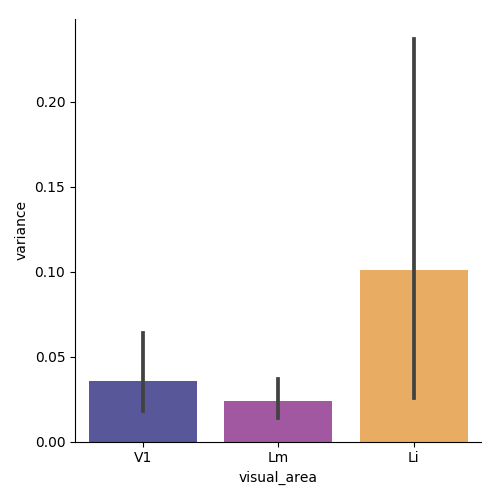

((11,), (11,), (14,))
('Shapiro-Wilk normality:', (0.632332444190979, 6.450402725022286e-05), (0.7244818806648254, 0.0009682603413239121), (0.36734282970428467, 6.37333073427726e-07))
F statistic = 0.841 and probability p = 0.440
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm   -0.0769  -0.2371 0.0832 False 
  Li     V1   -0.0656  -0.2258 0.0945 False 
  Lm     V1    0.0113  -0.1582 0.1808 False 
--------------------------------------------
KruskalResult(statistic=3.5164970164970271, pvalue=0.17234646303008197)
          Li      Lm        V1
Li -1.000000  0.1972  0.770997
Lm  0.197200 -1.0000  1.000000
V1  0.770997  1.0000 -1.000000


In [99]:
mvar = variance_by_area.groupby(['visual_area', 'datakey']).mean()
meanvars=[]
for visual_area, g in variance_by_area.groupby(['visual_area']):
    
    meanvars.append(pd.DataFrame({'variance': g.groupby(['datakey']).mean()['variance'],
                                  'datakey': g.groupby(['datakey']).mean().index.tolist(),
                                  'visual_area': [visual_area for _ in np.arange(0, g.groupby(['datakey']).mean().shape[0])]}))
meanvars = pd.concat(meanvars, axis=0)


g = calculate_stats_by_area(meanvars, metric='variance', 
                            palette=area_colors, alpha=0.7)


In [91]:
g.groupby(['datakey']).mean()

rid  variance
datakey                                  
20190420_JC076_fov1  125.688889  0.018718
20190501_JC076_fov1  119.390244  0.017757
20190507_JC083_fov1   87.666667  0.025698
20190510_JC083_fov1   88.173333  0.152956
20190511_JC083_fov1   84.483146  0.023008
20190522_JC084_fov1  121.910000  0.045344
20190613_JC097_fov1  118.206897  0.013486
20190616_JC097_fov1  221.510638  0.008705
20190617_JC097_fov1  197.320225  0.010486
20190622_JC085_fov1  197.164444  0.056123
20191006_JC110_fov1  191.961538  0.017860

#### Look at 1 animal first

In [45]:
datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
fov = 'FOV%i_zoom2p0x' % fovnum

In [46]:
# Load traces of responsive cells
traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, traceid=traceid, response_type=response_type,
                                    responsive_test=responsive_test, responsive_thr=responsive_thr)
roi_list = traces.columns.tolist()
rpositions = posdf.groupby(['animalid', 'session', 'fov']).get_group((animalid, session, fov))[['index', 'ap_pos', 'ml_pos']]


(268500, 100)

In [84]:
S = util.Session(animalid, session, fov)
masks, zimg = S.load_masks(rois='rois001')

[JC084] 20190522 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...


In [97]:
#### rescale fov
y_conversion=1.904 # top-to-bottom
x_conversion = 2.312 # left-to-right
um_per_pix = np.mean([x_conversion, y_conversion])
#um_per_pix
dimy, dimx = zimg.shape

new_y = int(round(dimy * um_per_pix)) #y_conversion))
new_x = int(round(dimx * um_per_pix)) #x_conversion))
print("FOV size: %i, %i um" % (new_x, new_y))
zimg_r = cv2.resize(zimg, (new_x, new_y))


FOV size: 1079, 1079 um


<IPython.core.display.Javascript object>


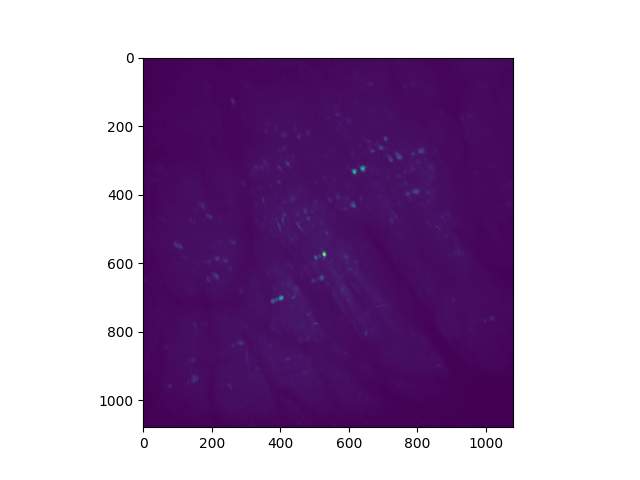

In [98]:
pl.figure()
pl.imshow(zimg_r)

#### Overlay rois

<IPython.core.display.Javascript object>


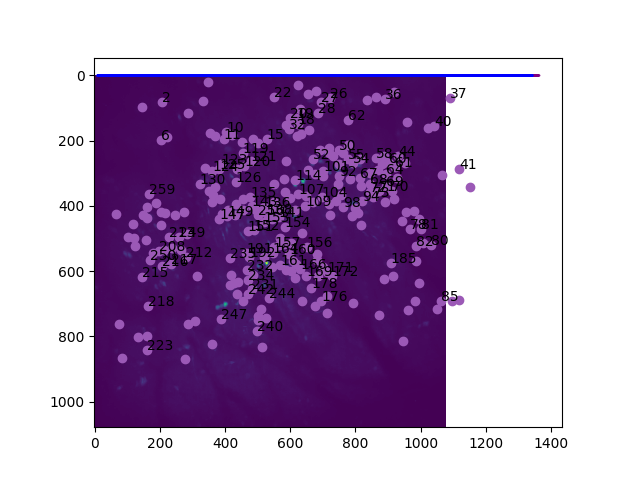

In [100]:
fig, ax = pl.subplots() #pl.figure()
ax.imshow(zimg_r)
ax.scatter(rpositions['ap_pos'], rpositions['ml_pos'])
for i in roi_list:
    xc = rpositions[rpositions['index']==i]['ap_pos']
    yc = rpositions[rpositions['index']==i]['ml_pos']
    ax.text(xc, yc, '%i' % int(i+1))
#ax.invert_yaxis()
#ax.set_xlim([0, 1200])
#ax.set_ylim([1200, 0])
#ax.set_aspect('equal')

#### calculate distances

In [104]:
rpos = rpositions[rpositions['index'].isin(roi_list)]
pwdists = pdist(rpos[['ml_pos', 'ap_pos']], metric='euclidean')
dist_matrix = squareform(pwdists)
dist_matrix = pd.DataFrame(dist_matrix, index=roi_list, columns=roi_list)

<IPython.core.display.Javascript object>


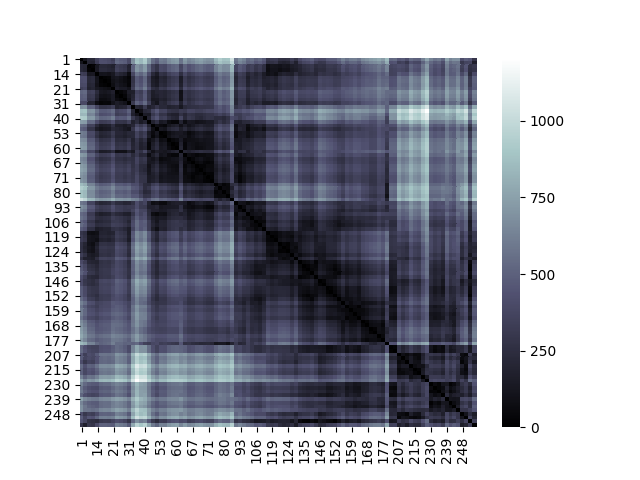

In [105]:
pl.figure()
sns.heatmap(dist_matrix, cmap='bone')


#### Correlation bw distance and time-course

In [109]:
tracecorr = traces.corr()


<IPython.core.display.Javascript object>


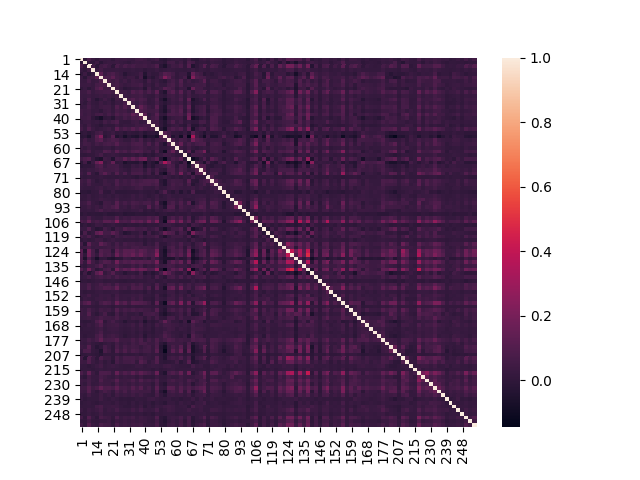

In [112]:
pl.figure()
sns.heatmap(tracecorr)

#### Get unique corrs

In [148]:
pairwise_trace_coefs = get_corrcoefs(tracecorr)
pairwise_distances = get_corrcoefs(dist_matrix)

In [149]:
pairwise_distances

level_0  level_1    corrcoef
1           1        5  116.463478
2           1        9  215.876713
3           1       10  219.795602
4           1       14  339.554781
5           1       17  420.306844
6           1       18  413.247501
7           1       19  394.622262
8           1       21  343.105597
9           1       25  514.395799
10          1       26  486.470137
11          1       27  478.578651
12          1       31  395.861406
13          1       35  681.100941
14          1       36  880.330974
15          1       39  837.432792
16          1       40  933.840122
17          1       43  741.567571
18          1       49  559.886150
19          1       51  493.269008
20          1       53  612.971105
21          1       54  594.633184
22          1       57  677.687049
23          1       59  719.665671
24          1       60  741.074831
25          1       61  570.238584
26          1       63  721.105040
27          1       66  650.024933
28          1       67  682.856124
29          1       68  732.462205
30          1       69  755.908481
...       ...      ...         ...
9198      234      255  157.078697
9199      234      258  318.124106
9293      239      241  117.790713
9294      239      243  107.688885
9295      239      246  114.751710
9296      239      248  374.049873
9297      239      249  392.409235
9298      239      255  356.774851
9299      239      258  536.179091
9394      241      243   66.223103
9395      241      246  112.656835
9396      241      248  273.086500
9397      241      249  316.090024
9398      241      255  244.442170
9399      241      258  431.773316
9495      243      246  159.705840
9496      243      248  333.083993
9497      243      249  381.858416
9498      243      255  257.684288
9499      243      258  488.245856
9596      246      248  283.270015
9597      246      249  283.305934
9598      246      255  340.005003
9599      246      258  444.925302
9697      248      249  112.832976
9698      248      255  252.744901
9699      248      258  162.539866
9798      249      255  359.346122
9799      249      258  204.179256
9899      255      258  342.101333

[4950 rows x 3 columns]

<IPython.core.display.Javascript object>


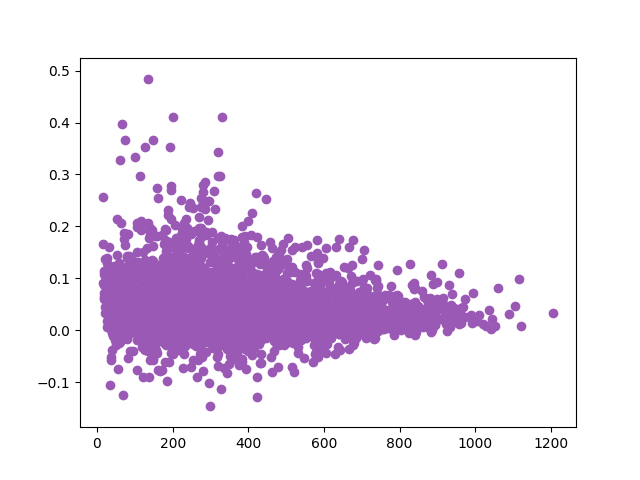

In [152]:
pl.figure()
pl.scatter(pairwise_distances['corrcoef'], pairwise_trace_coefs['corrcoef'])


# Calculcate Fano Factor - trial-to-trial variability

In [12]:
def get_fano_factor(animalid, session, fovnum, curr_exp, analysis_dir,
                                   traceid='traces001', response_type='dff',
                   responsive_test='ROC', responsive_thr=0.05):
    
    # Load experiment neucurr_objectral data
    fov = 'FOV%i_zoom2p0x' % fovnum
    exp = util.Objects(animalid, session, fov, traceid=traceid)
    exp.load(trace_type='dff', update_self=True, make_equal=True)
    labels = exp.data.labels.copy()

    # Get stimulus config info
    sdf = exp.data.sdf
    sdf = reformat_morph_values(sdf)
    n_conditions = len(sdf['size'].unique())
    color_list = sns.color_palette('cubehelix', n_conditions)
    cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

    # Add stimulus config info to face data
    trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                             for trial, g in labels.groupby(['trial'])],
                  'trial': [int(trial[5:]) \
                             for trial, g in labels.groupby(['trial'])]})
    
    # ----- NEURAL STUFF -------------------------------
    # Get responsive cells
    responsive_cells, ncells_total = exp.get_responsive_cells(response_type=response_type,\
                                                              responsive_test=responsive_test, 
                                                              responsive_thr=responsive_thr)
    fano_pre = []
    fano_stim = []
    s_on = int(labels['stim_on_frame'].mean())
    n_on = int(labels['nframes_on'].mean())
    for trial, g in labels.groupby(['trial']):

        curr_traces = exp.data.traces[responsive_cells].iloc[g.index]

        ff_pre = np.var(abs(curr_traces.iloc[0:s_on]), ddof=1, axis=0) / np.nanmean(abs(curr_traces.iloc[0:s_on]), axis=0)
        ff_stim = np.var(abs(curr_traces.iloc[s_on:s_on+n_on]), ddof=1, axis=0) / np.nanmean(abs(curr_traces.iloc[s_on:s_on+n_on]), axis=0)

        fano_pre.append(ff_pre)
        fano_stim.append(ff_stim)

    fano_pre = pd.DataFrame(np.vstack(fano_pre), columns=responsive_cells)
    fano_stim = pd.DataFrame(np.vstack(fano_stim), columns=responsive_cells)

    #print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
    #neuraldata = roi_responses[responsive_cells]

    return fano_stim, fano_pre, trial_key
    

In [792]:
load_fano = False
fano_results = os.path.join(outdir, 'fano-stim.pkl')
if os.path.exists(fano_results):
    with open(fano_results, 'rb') as f:
        FANO_stim = pkl.load(f)
else:
    load_fano=True

In [793]:
if load_fano:
    FANO_stim = {}
    #FANO_pre = {}
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
        if animalid == 'JC076':
            continue
        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  
        fano_stim, _, trialkey = get_fano_factor(animalid, session, fovnum, curr_exp, analysis_dir,
                                       traceid='traces001')

        FANO_stim[datakey] = fano_stim
        #FANO_pre[datakey] = fano_pre
    with open(fano_results, 'wb') as f:
        pkl.dump(FANO_stim, f, protocol=pkl.HIGHEST_PROTOCOL)

In [45]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state'

In [798]:
datakey

'20190616_JC097_fov1_blobs'

In [816]:
# exclude_keys = ['20190511_JC083_fov1_blobs', '20190510_JC083_fov1_blobs', '20190501_JC076_fov1_blobs',
#                 '20190513_JC078_fov1_blobs', '20190504_JC078_fov1_blobs', '20190509_JC078_fov1_blobs', '20190627_JC091_fov1_blobs', '20190517_JC083_fov1_blobs', '20190512_JC083_fov1_blobs'
#                 '20191111_JC120_fov1_blobs', '20191105_JC117_fov1_blobs', '20191008_JC091_fov1_blobs', '20190605_JC090_fov1_blobs']

In [950]:
FANO_stim[datakey].shape

(1500, 188)

# Get all fanos
Calculate Fano Factor for each trial for all cells.

In [46]:
import scikit_posthocs as sp

In [47]:
def calculate_stats_by_area(mdf, metric='MI'):

    g= sns.catplot(x='visual_area', y=metric, kind='bar', data=mdf, palette='colorblind',
               order=['V1', 'Lm', 'Li'] )

    
    c1 = mdf[mdf['visual_area']=='V1'][metric]
    c2 = mdf[mdf['visual_area']=='Lm'][metric]
    c3 = mdf[mdf['visual_area']=='Li'][metric]
    print(c1.shape, c2.shape, c3.shape)

    # Shapiro-Wilk normality test 
    print("Shapiro-Wilk normality:", spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) )

    F, p = spstats.f_oneway(c1, c2, c3)
    print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

    scores = np.hstack([c1, c2, c3])
    groups = np.hstack([['V1' for _ in range(len(c1))], 
                       ['Lm' for _ in range(len(c2))],
                       ['Li' for _ in range(len(c3))]])
    # Note that data in sheet have been preformatted in Group and Score columns 
    # Boolean values refer to whether we should reject the null hypothesis (H0) that
    # the means of the tested pair are statistically similar (non-significant differences)
    mcobj = ml.MultiComparison(scores, groups)
    out = mcobj.tukeyhsd(0.05) 
    print(out)

    print(spstats.kruskal(c1, c2, c3))
    statsdf = mdf[['visual_area', metric]].copy()
    print(sp.posthoc_dunn(statsdf, val_col=metric, group_col='visual_area', p_adjust='bonferroni')) #'fdr_by')
    
    return g

In [932]:
all_fanos = []
for datakey in FANO_stim.keys():
    #if datakey in exclude_keys:
    #    continue
        
    fano_vals = FANO_stim[datakey].values.ravel()
    session, animalid, fovn, _ = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    nsamples = len(fano_vals)
    ntrials = FANO_stim[datakey].shape[0]
    all_fanos.append(pd.DataFrame({'visual_area': [visual_area for _ in np.arange(0, nsamples)],
                                  'rid': np.hstack([FANO_stim[datakey].columns.tolist() for _ in np.arange(0, ntrials)]),
                                  'fano_stim': fano_vals,
                                  'datakey': [datakey for _ in np.arange(0, nsamples)]}) )
    
all_fanos = pd.concat(all_fanos, axis=0)

In [936]:
all_fanos.groupby(['visual_area']).count()

datakey  fano_stim      rid
visual_area                             
Li           1463050    1463050  1463050
Lm           1606850    1606850  1606850
V1           1652850    1652850  1652850

<IPython.core.display.Javascript object>


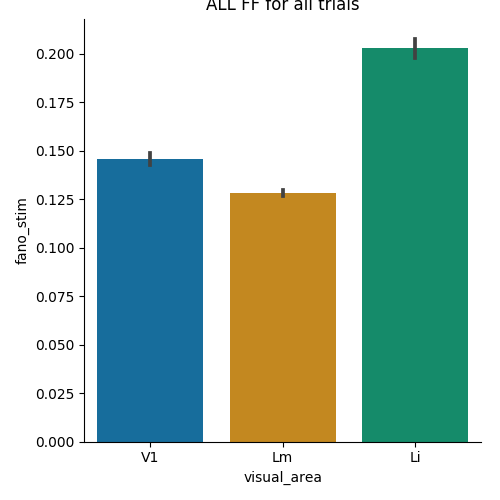

((1079,), (1095,), (938,))
('Shapiro-Wilk normality:', (0.8895418047904968, 4.388442460208222e-27), (0.997715175151825, 0.13272003829479218), (0.8251557350158691, 9.11970522622178e-31))
F statistic = 490.688 and probability p = 0.000
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm   -0.0745  -0.0803 -0.0687  True 
  Li     V1   -0.0572   -0.063 -0.0514  True 
  Lm     V1    0.0173   0.0118  0.0229  True 
---------------------------------------------
KruskalResult(statistic=914.33492825858411, pvalue=2.8490037635522557e-199)
               Li             Lm             V1
Li  -1.000000e+00  1.906408e-181  1.013003e-119
Lm  1.906408e-181  -1.000000e+00   7.613303e-08
V1  1.013003e-119   7.613303e-08  -1.000000e+00


In [947]:
g = calculate_stats_by_area(mean_fanos, metric='fano_stim')
pl.title('ALL FF for all trials')

figname = 'fano-factor_all-trial-values_collapse-sessions'
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.svg' % figname))
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.png' % figname))


In [954]:
#FANO_stim[datakey].mean().shape

(188,)

# Get mean fano factor for each cell

In [955]:
mean_fanos = []
for datakey in FANO_stim.keys():
    #if datakey in exclude_keys:
    #    continue
        
    fano_vals = FANO_stim[datakey].mean()
    session, animalid, fovn, _ = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    nsamples = len(fano_vals)
    ntrials = FANO_stim[datakey].shape[0]
    mean_fanos.append(pd.DataFrame({'visual_area': [visual_area for _ in np.arange(0, nsamples)],
                                  'rid': FANO_stim[datakey].columns.tolist(),
                                  'fano_stim': fano_vals,
                                  'datakey': [datakey for _ in np.arange(0, nsamples)]}) )
    
mean_fanos = pd.concat(mean_fanos, axis=0)

In [956]:
mean_fanos.groupby(['visual_area']).count()

datakey  fano_stim   rid
visual_area                          
Li               938        938   938
Lm              1095       1095  1095
V1              1079       1079  1079

<IPython.core.display.Javascript object>


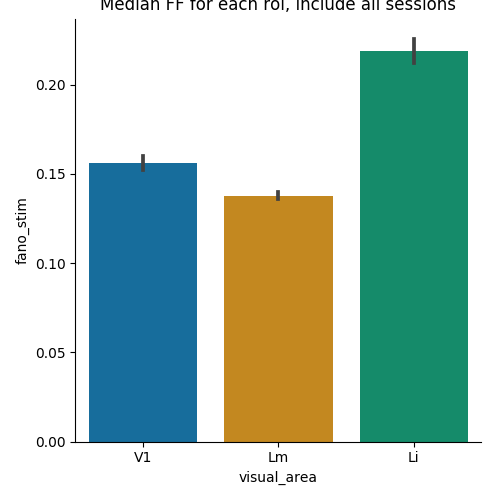

((1079,), (1095,), (938,))
('Shapiro-Wilk normality:', (0.8913357853889465, 6.805078554381926e-27), (0.9486494064331055, 4.392433484208912e-19), (0.6381973028182983, 1.7713253368144283e-40))
F statistic = 353.076 and probability p = 0.000
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm    -0.081  -0.0884 -0.0736  True 
  Li     V1   -0.0626   -0.07  -0.0552  True 
  Lm     V1    0.0184   0.0112  0.0255  True 
---------------------------------------------
KruskalResult(statistic=847.1018084943571, pvalue=1.1328684455815086e-184)
               Li             Lm             V1
Li  -1.000000e+00  1.477142e-168  1.843413e-110
Lm  1.477142e-168  -1.000000e+00   1.499557e-07
V1  1.843413e-110   1.499557e-07  -1.000000e+00


In [957]:
g = calculate_stats_by_area(mean_fanos, metric='fano_stim')
pl.title('Median FF for each roi, include all sessions')

figname = 'fano-factor_median-roi-values_collapse-sessions'
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.svg' % figname))
pl.savefig(os.path.join(outdir, 'trial_variability', '%s.png' % figname))


In [745]:
visual_areas = ['V1', 'Lm', 'Li']
area_colors = dict((vis, col) for vis, col in zip(visual_areas, sns.color_palette('colorblind', n_colors=3)))


In [907]:
all_fanos.groupby(['datakey']).mean()

fano_stim
datakey                             
20190420_JC076_fov1_blobs   0.150180
20190430_JC078_fov1_blobs   0.096263
20190501_JC076_fov1_blobs   0.120468
20190504_JC078_fov1_blobs   0.105516
20190506_JC080_fov1_blobs   0.141414
20190507_JC083_fov1_blobs   0.143689
20190508_JC083_fov1_blobs   0.125335
20190509_JC078_fov1_blobs   0.125394
20190510_JC083_fov1_blobs   0.167942
20190511_JC083_fov1_blobs   0.136510
20190512_JC083_fov1_blobs   0.146737
20190513_JC078_fov1_blobs   0.124531
20190517_JC083_fov1_blobs   0.120777
20190522_JC084_fov1_blobs   0.144616
20190525_JC084_fov1_blobs   0.181851
20190602_JC091_fov1_blobs   0.163246
20190603_JC080_fov1_blobs   0.166386
20190605_JC090_fov1_blobs   0.269225
20190606_JC091_fov1_blobs   0.196034
20190607_JC091_fov1_blobs   0.172872
20190609_JC099_fov1_blobs   0.288436
20190612_JC099_fov1_blobs   0.218687
20190613_JC097_fov1_blobs   0.111820
20190614_JC091_fov1_blobs   0.226144
20190616_JC097_fov1_blobs   0.094894
20190617_JC099_fov1_blobs   0.253843
20190622_JC085_fov1_blobs   0.249575
20190627_JC091_fov1_blobs   0.156958
20191006_JC110_fov1_blobs   0.151630
20191018_JC113_fov1_blobs   0.154236
20191105_JC117_fov1_blobs   0.030241
20191111_JC120_fov1_blobs   0.475793

<IPython.core.display.Javascript object>


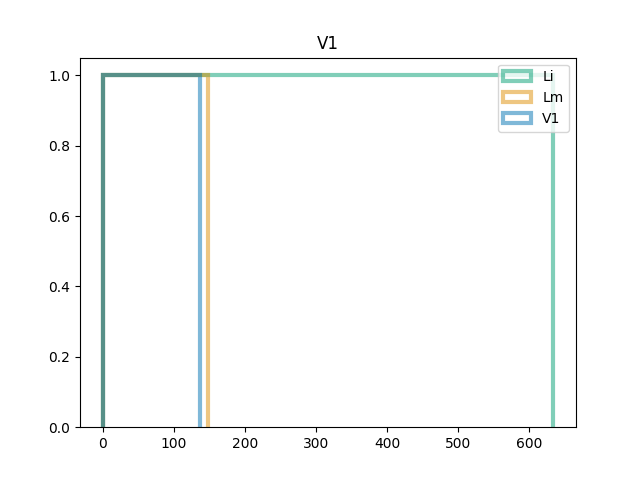

In [965]:
cdf=True

fig, ax = pl.subplots()
for visual_area, g in all_fanos.groupby(['visual_area']):
    values = g['fano_stim'].dropna().values
    weights = np.ones_like(values)/float(len(values))

    ax.hist(values, 
            cumulative=True,
            label=visual_area,
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=3,
            normed=0, weights=weights, bins=50)
    ax.set_title(visual_area)
                   
pl.legend()

In [966]:
fanos_by_session=[]
for visual_area, g in mean_fanos.groupby(['visual_area']):
    mvals = g.groupby(['datakey'])['fano_stim'].mean()
    counts = g.groupby(['datakey'])['fano_stim'].count()
    fanos_by_session.append(pd.DataFrame({'mean_fano': mvals,
                                          'counts': counts,
                                         'visual_area': [visual_area for _ in np.arange(0, len(mvals))]}))

    
fanos_by_session = pd.concat(fanos_by_session)

<IPython.core.display.Javascript object>


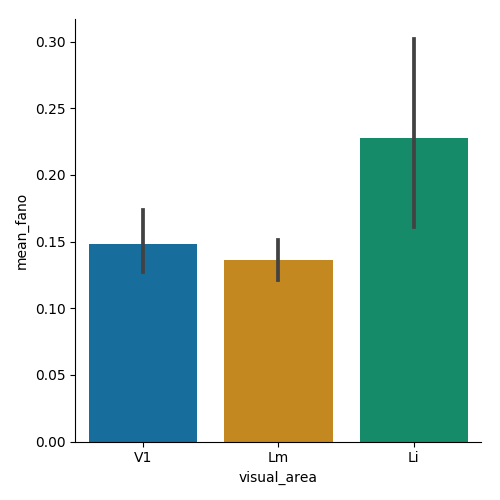

In [967]:
sns.catplot(x='visual_area', y='mean_fano', data=fanos_by_session, kind='bar',
           palette='colorblind', order=['V1', 'Lm', 'Li'])

#### Stats

In [970]:
c1 = fanos_by_session[fanos_by_session['visual_area']=='V1']['mean_fano']
c2 = fanos_by_session[fanos_by_session['visual_area']=='Lm']['mean_fano']
c3 = fanos_by_session[fanos_by_session['visual_area']=='Li']['mean_fano']
print(c1.shape, c2.shape, c3.shape)

# Shapiro-Wilk normality test 
print("Shapiro-Wilk normality:", spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) )

F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])

# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

print(spstats.kruskal(c1, c2, c3))
statsdf = fanos_by_session[['visual_area', 'mean_fano']].copy()
sp.posthoc_dunn(statsdf, val_col='mean_fano', group_col='visual_area', p_adjust='bonferroni') #'fdr_by')

((10,), (11,), (11,))
('Shapiro-Wilk normality:', (0.8586461544036865, 0.07355262339115143), (0.9656316041946411, 0.8393511176109314), (0.8765125274658203, 0.09393627196550369))
F statistic = 4.558 and probability p = 0.019
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  Li     Lm   -0.0914  -0.1722 -0.0106  True 
  Li     V1   -0.0793  -0.1621  0.0035 False 
  Lm     V1    0.0121  -0.0707  0.0949 False 
---------------------------------------------
KruskalResult(statistic=10.083161157024804, pvalue=0.0064635241329951392)


Li       Lm        V1
Li -1.000000  0.01011  0.037766
Lm  0.010110 -1.00000  1.000000
V1  0.037766  1.00000 -1.000000

<IPython.core.display.Javascript object>


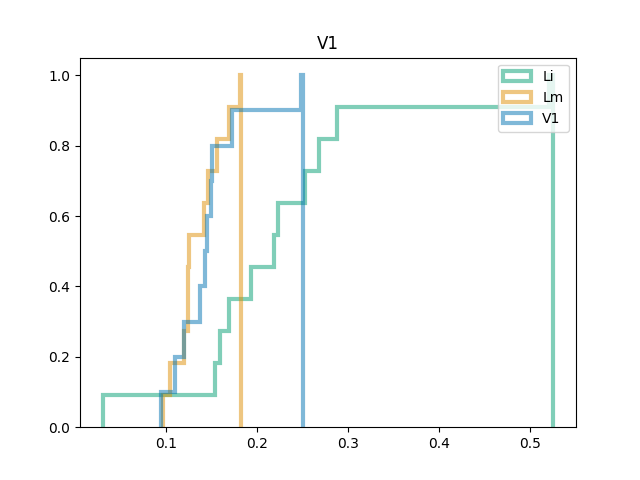

In [978]:
cdf=True

fig, ax = pl.subplots()
for visual_area, g in fanos_by_session.groupby(['visual_area']):
    values = g['mean_fano'].dropna().values
    weights = np.ones_like(values)/float(len(values))

    ax.hist(values, 
            cumulative=True,
            label=visual_area,
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=3,
            normed=0, weights=weights, bins=100)
    ax.set_title(visual_area)
                   
pl.legend()

In [ ]:
fanos_by_session

In [3]:
analysis_dir

NameError: name 'analysis_dir' is not defined

# Load data

In [63]:
# def get_pupil_stats(animalid, session, fovnum, curr_exp, analysis_dir, feature='pupil',
#                                    traceid='traces001',
#                                    eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp',
#                              rootdir='/n/coxfs01/2p-data'):
    
#     # Load experiment neural data
#     fov = 'FOV%i_zoom2p0x' % fovnum
#     #exp = util.Objects(animalid, session, fov, traceid=traceid)
#     #exp.load(trace_type='dff', update_self=True, make_equal=True)
#     labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
#                           '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
#     l = np.load(labels_dfile)
#     labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns'])

# #     facemeta, pupildata = load_pupil_data(animalid, session, fovnum, curr_exp, analysis_dir, 
# #                                traceid=traceid, eyetracker_dir=eyetracker_dir)
#     facemeta, pupildata = load_pose_data(animalid, session, fovnum, curr_exp, analysis_dir, 
#                                          feature=feature,
#                                            traceid=traceid, eyetracker_dir=eyetracker_dir)
    
#     pupilstats = calculate_pupil_stats(facemeta, pupildata, labels)
    
#     # Check trial nums
#     trial_nums = sorted([int(t[5:]) for t in labels['trial'].unique()])
#     missing = [p for p in pupilstats['trial'].values if p not in trial_nums]
    
#     assert len(missing)==0, "****Bad trial indexing! [%s]" % '_'.join(session, animalid, fov, curr_exp)
#     return pupilstats

def get_feature_stats(animalid, session, fovnum, curr_exp, analysis_dir, feature='pupil',
                                   traceid='traces001',
                                   eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp',
                             rootdir='/n/coxfs01/2p-data'):
    
    # Load experiment neural data
    fov = 'FOV%i_zoom2p0x' % fovnum
    #exp = util.Objects(animalid, session, fov, traceid=traceid)
    #exp.load(trace_type='dff', update_self=True, make_equal=True)
    labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
                          '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
    l = np.load(labels_dfile)
    labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns'])

#     facemeta, pupildata = load_pupil_data(animalid, session, fovnum, curr_exp, analysis_dir, 
#                                traceid=traceid, eyetracker_dir=eyetracker_dir)
    facemeta, pupildata = load_pose_data(animalid, session, fovnum, curr_exp, analysis_dir, 
                                         feature=feature,
                                           traceid=traceid, eyetracker_dir=eyetracker_dir)
    
    pupilstats = calculate_pose_stats(facemeta, pupildata, labels, feature=feature)
    
    # Check trial nums
    trial_nums = sorted([int(t[5:]) for t in labels['trial'].unique()])
    missing = [p for p in pupilstats['trial'].values if p not in trial_nums]
    
    assert len(missing)==0, "****Bad trial indexing! [%s]" % '_'.join(session, animalid, fov, curr_exp)
    return pupilstats
        

In [35]:
epoch = 'stimulus_on'
pre_ITI_ms = 1000
post_ITI_ms = 1000


In [36]:
responsive_test = 'ROC'
responsive_thr = 0.05
response_type = 'dff'
traceid = 'traces001'


# Load neural data

['stats-traces001-corrected-dff-nstds-thr-10.00',
 'experiment-objects',
 'stats-traces001-corrected-dff-ROC-thr-0.05',
 'Lm_blobs_incorrect-params.json',
 'tmpdf.pkl',
 'tmpdf-blobs-rsa.pkl',
 'blobs_traces001-dff_ROC-thr-0.05.pkl',
 'rf-luminances_traces001-dff_blobs.pkl']

In [38]:
data_dir = os.path.join(aggregate_dir, 'data-stats')
os.listdir(data_dir)

load_data = False
blobsdata_outfile = os.path.join(data_dir, 'blobs_%s-%s_%s-thr-%.2f.pkl' % (traceid, response_type, responsive_test, responsive_thr))
print(blobsdata_outfile)
if os.path.exists(blobsdata_outfile):
    print("...loading data")
    with open(blobsdata_outfile, 'rb') as f:
        NEURALDATA = pkl.load(f)
else:
    load_data = True


/n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/blobs_traces001-dff_ROC-thr-0.05.pkl
...loading data


# Load pupil data

In [39]:
facedata_dir = os.path.join(aggregate_dir, 'behavior-state')

In [40]:
curr_exp

'blobs'

In [69]:
load_data = False
feature = 'snout'
pupildata_outfile = os.path.join(facedata_dir, '%s_%s2_snapshot-%i.pkl' % (curr_exp, feature, snapshot))
print(pupildata_outfile)
if os.path.exists(pupildata_outfile):
    print("...loading data")
    with open(pupildata_outfile, 'rb') as f:
        PUPILDATA = pkl.load(f)
else:
    load_data = True
print(load_data)

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/blobs_snout2_snapshot-391800.pkl
True


In [70]:
if load_data:
    SNOUTDATA = {}
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):

        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  

#         pupilstats = get_pupil_stats(animalid, session, fovnum, curr_exp, analysis_dir,
#                                            traceid=traceid,
#                                            eyetracker_dir=eyetracker_dir, rootdir=rootdir)
        pupilstats = get_feature_stats(animalid, session, fovnum, curr_exp, analysis_dir, feature=feature,
                                           traceid=traceid,
                                           eyetracker_dir=eyetracker_dir, rootdir=rootdir)

        SNOUTDATA[datakey] = pupilstats
    
    with open(pupildata_outfile, 'wb') as f:
        pkl.dump(SNOUTDATA, f, protocol=pkl.HIGHEST_PROTOCOL)

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190605_JC090_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f1_20190605141933120131')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f2_20190605151304470267')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f3_20190605160757630689')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f4_20190605171707227152')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f5_20190605180717539830')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f6_20190605183331571376')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f7_20190605184821422690')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190605_JC090_fov1_blobs_f1_20190605141933120131')
----- File 1.-----
Checking for missing frames.
[428, 6719, 21359]
... found 3 funky frame chunks.
... interpola

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:30: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:80: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


--- |blobs|: getting MW info for run_2
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190605_JC090_fov1_blobs_f2_20190605151304470267')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 24159 to 24159 frames
Full run duration: 20.13 min
--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190605_JC090_fov1_blobs_f3_20190605160757630689')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17854 to 17854 frames
Full run duration: 14.88 min
--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190605_JC090_fov1_blobs_f4_20190605171707227152')
----- File 4.-----
Checking for missing frames.
[2639, 10139, 12798, 16859, 20425]
... found 5 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... inte

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190602_JC091_fov1_blobs_f4_20190602185634063844')
----- File 4.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 18479 to 18479 frames
Full run duration: 15.40 min
--- |blobs|: getting MW info for run_5
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190602_JC091_fov1_blobs_f5_20190602195543014871')
----- File 5.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 21811 to 21811 frames
Full run duration: 18.18 min
--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190602_JC091_fov1_blobs_f6_20190602203012939604')
----- File 6.-----
Checking for missing frames.
[8514]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18418 to 18424 frames
Full run duration: 15.35 mi

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f3_20190606174323494731')
----- File 3.-----
Checking for missing frames.
[15065]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19464 to 19470 frames
Full run duration: 16.23 min
--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f4_20190606182920549874')
----- File 4.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17458 to 17458 frames
Full run duration: 14.55 min
--- |blobs|: getting MW info for run_5
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f5_20190606193721346275')
----- File 5.-----
Checking for missing frames.
[1775, 1776, 1782, 1784]
... found 4 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpola

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

...curr run: 5 [20190607_JC091_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190607_JC091_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** 

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190614_JC091_fov1_blobs_f4_20190614185736563063')
----- File 4.-----
Checking for missing frames.
[1259, 7619, 12779]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18545 to 18563 frames
Full run duration: 15.47 min
--- |blobs|: getting MW info for run_5
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190614_JC091_fov1_blobs_f5_20190614195320745745')
----- File 5.-----
Checking for missing frames.
[8459, 9599, 11158, 11160, 11161, 11162, 11164, 12059, 13799]
... found 9 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190609_JC099_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190609_JC099_fov1_blobs_f1_20190609111435073145')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190609_JC099_fov1_blobs_f2_20190609120626917118')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190609_JC099_fov1_blobs_f3_20190609131907762511')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190609_JC099_fov1_blobs_f4_20190609142912202443')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190609_JC099_fov1_blobs_f5_20190609154127271261')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190609_JC099_fov1_blobs_f6_20190609155730800664')
--- |blobs|: getting MW info for run_1
--- 20 tifs in run
--- 250 trials in run
('Eyetracker:', '20190609_JC099_fov1_blobs_f1_20190609111435073145')
----- File 1.-----
Checking for missing frames.
[8879, 12579]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info sha

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

... checking movies for dset: 20190612_JC099_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190612_JC099_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190612_JC099_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190612_JC099_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190612_JC099_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190612_JC099_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190612_JC099_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****


***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
('[blobs] Found runs:', [1, 2, 3, 4])
... finding movies for dset: 20190617_JC099_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f1_20190617115219029187')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f2_20190617130412072416')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f3_20190617134947813306')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f4_20190617143514933529')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190617_JC099_fov1_blobs_f1_20190617115219029187')
----- File 1.-----
Checking for missing frames.
[1019]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18530 to 

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_5
--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191018_JC113_fov1_blobs_f6_20191018180959043999')
----- File 6.-----
Checking for missing frames.
[16882]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20242 to 20248 frames
Full run duration: 16.87 min
--- |blobs|: getting MW info for run_7
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191018_JC113_fov1_blobs_f7_20191018184830021925')
----- File 7.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 23950 to 23950 frames
Full run duration: 19.96 min
--- |blobs|: getting MW info for run_8
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191018_JC113_fov1_blobs_f8_20191018190953802839')
----- File 8.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 19299 to 

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20191111_JC120_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f1_20191111174912021855')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f2_20191111180509719344')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f3_20191111192242972573')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f4_20191111193729820297')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f5_20191111203842472139')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f6_20191111205418868821')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191111_JC120_fov1_blobs_f1_20191111174912021855')
----- File 1.-----
Checking for missing frames.
[119, 2639, 3539, 3899, 4472, 5099, 5699, 7799, 7919, 10319, 10619, 10799, 10859, 11219, 11399, 12299, 12479, 13379]
... found 18 funky frame chunks.
... inte

--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191111_JC120_fov1_blobs_f6_20191111205418868821')
----- File 6.-----
Checking for missing frames.
[719, 779, 1739, 1799, 2039, 2699, 2939, 4319, 4859, 5099, 6479, 6539, 6599, 6719, 7439, 7559, 8699, 8759, 8999, 9059, 9239, 9419, 9539, 9659, 9779, 9839, 9959, 10019, 10079, 10199, 10319, 11279, 11459, 11639, 11699, 11819, 11879, 11939, 12179, 12299, 12479, 12779, 12839, 13019, 13199, 13439, 13499, 13559, 15899, 16019, 16439]
... found 51 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

...curr run: 5 [20190504_JC078_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190504_JC078_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** 

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190509_JC078_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracke

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

...curr run: 4 [20190506_JC080_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** g

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- [trial 1367] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1368] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1369] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1370] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1371] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1372] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1373] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1374] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1375] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1376] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1377] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1378] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1379] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1380] warning, run_num 6 not found in pupildata. skip

--- |blobs|: getting MW info for run_5
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190603_JC080_fov1_blobs_f5_20190603215803619784')
----- File 5.-----
Checking for missing frames.
[17122]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18152 to 18158 frames
Full run duration: 15.13 min
--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190603_JC080_fov1_blobs_f6_20190603223742301912')
----- File 6.-----
Checking for missing frames.
[9179]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17478 to 17484 frames
Full run duration: 14.57 min
... checking movies for dset: 20190603_JC080_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190603_JC080_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190603_JC080_fov1_blobs_f

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190512_JC083_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f1_20190512114131814499')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f2_20190512122224554535')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f3_20190512130147904811')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f4_20190512135346463785')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f5_20190512151235327586')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f6_20190512152943893769')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190512_JC083_fov1_blobs_f7_20190512164710136564')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190517_JC083_fov1_blobs_f3_20190517183945443999')
----- File 3.-----
Checking for missing frames.
[12198]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18634 to 18640 frames
Full run duration: 15.53 min
--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190517_JC083_fov1_blobs_f4_20190517193224786778')
----- File 4.-----
Checking for missing frames.
[10509, 10510, 10511, 12839, 13907]
... found 5 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19948 to 19978 frames
Full run duration: 16.65 min
--- |blobs|: getting MW info for run_5
--- 10 

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190525_JC084_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f1_20190525140942064980')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f2_20190525150720963293')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f3_20190525160339117588')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f4_20190525172142146175')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f5_20190525182047202742')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f6_20190525191458512131')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190525_JC084_fov1_blobs_f1_201905251409

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190420_JC076_fov1_blobs_f6_20190420205628949222')
----- File 6.-----
Checking for missing frames.
[20921]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 25423 to 25429 frames
Full run duration: 21.19 min
... checking movies for dset: 20190420_JC076_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190420_JC076_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190420_JC076_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190420_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190420_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190420_JC076_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190420_JC076_fov1

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190501_JC076_fov1_blobs_f6_20190501210834826986')
----- File 6.-----
Checking for missing frames.
[18501]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18545 to 18551 frames
Full run duration: 15.45 min
... checking movies for dset: 20190501_JC076_fov1_blobs
... found 4 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190501_JC076_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190501_JC076_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190501_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190501_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
*****

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- [trial 1219] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1220] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1221] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1222] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1223] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1224] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1225] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1226] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1227] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1228] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1229] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1230] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1231] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1232] warning, run_num 5 not found in pupildata. skip

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190507_JC083_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f1_20190507181737910960')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f2_20190507185603009640')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f3_20190507193534058903')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f4_20190507201426660931')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f5_20190507210250493553')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190507_JC083_fov1_blobs_f6_20190507214201726280')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190507_JC083_fov1_blobs_f1_20190507181737910960')
----- File 1.-----
Checking for missing frames.
[1760, 13753]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info sha

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190522_JC084_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f1_20190522172015830062')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f2_20190522181621108855')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f3_20190522190630607437')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f4_20190522203150670595')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f5_20190522214948588541')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f6_20190522222633434359')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190522_JC084_fov1_blobs_f1_20190522172015830062')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 16695 to 16695 frames
Full run duration: 13.91 min
--- |blobs|: getting MW info for run_2

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190622_JC085_fov1_blobs_f6_20190622182912698479')
----- File 6.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 20311 to 20311 frames
Full run duration: 16.93 min
... checking movies for dset: 20190622_JC085_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190622_JC085_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190622_JC085_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190622_JC085_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190622_JC085_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190622_JC085_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190622_JC085_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_3918

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_6
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190613_JC097_fov1_blobs_f6_20190613184332233938')
----- File 6.-----
Checking for missing frames.
[3659, 4259, 4319, 4379, 4619, 4799, 5279, 5339, 5399, 5579, 6179, 6239, 8279, 11159, 12179, 12239, 12299, 12419, 14459, 14519, 15959, 16319, 16379, 16439]
... found 24 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
...

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

--- |blobs|: getting MW info for run_2
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191006_JC110_fov1_blobs_f2_20191006163850488300')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 25899 to 25899 frames
Full run duration: 21.58 min
--- |blobs|: getting MW info for run_3
--- 7 tifs in run
--- 175 trials in run
('Eyetracker:', '20191006_JC110_fov1_blobs_f3_20191006174643178944')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17957 to 17957 frames
Full run duration: 14.97 min
--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20191006_JC110_fov1_blobs_f4_20191006184201835960')
----- File 4.-----
Checking for missing frames.
[2215, 12212, 18846]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 fra

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** getting snout_area *****
***** ge

In [67]:
pupildata_outfile

'/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/blobs_snout_snapshot-391800.pkl'

In [327]:

with open(pupildata_outfile, 'wb') as f:
    pkl.dump(PUPILDATA, f, protocol=pkl.HIGHEST_PROTOCOL)

In [325]:
datakey = '20190606_JC091_fov1_blobs'

In [326]:
PUPILDATA[datakey] = pupilstats

In [ ]:
#20191018_JC113_fov1_blobs_f12DLC_resnet50_facetrackingJan25shuffle1_391800
#20190517_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800
20191006_JC110_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800

20190606_JC091_fov1

In [269]:
animalid = 'JC091'
session = '20190606'
fov ='FOV1_zoom2p0x'
curr_exp = 'blobs'

labels_dfile = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*%s*' % curr_exp, 'traces',
                      '%s*' % traceid, 'data_arrays', 'np_subtracted.npz'))[0]
l = np.load(labels_dfile)
labels = pd.DataFrame(data=l['labels_data'], columns=l['labels_columns']).dropna()

In [270]:
labels['config'].unique().astype(str)

array(['config020', 'config016', 'config044', 'config001', 'config046',
       'config036', 'config011', 'config041', 'config013', 'config049',
       'config050', 'config022', 'config034', 'config024', 'config019',
       'config026', 'config033', 'config006', 'config031', 'config012',
       'config042', 'config004', 'config005', 'config045', 'config023',
       'config030', 'config039', 'config021', 'config032', 'config025',
       'config018', 'config007', 'config003', 'config015', 'config038',
       'config043', 'config017', 'config008', 'config027', 'config048',
       'config047', 'config014', 'config010', 'config029', 'config002',
       'config028', 'config040', 'config037', 'config009', 'config035'],
      dtype='|S9')

In [271]:
len(labels['trial'].unique())


1625

In [316]:

facemeta, pupildata = load_pupil_data(animalid, session, fovnum, curr_exp, analysis_dir, 
                           traceid=traceid, eyetracker_dir=eyetracker_dir)


('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190606_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f1_20190606163148451173')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f2_20190606172228099376')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f3_20190606174323494731')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f4_20190606182920549874')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f5_20190606193721346275')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f6_20190606202806999176')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f7_20190606205830156361')
--- |blobs|: getting MW info for run_1
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f1_20190606163148451173')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed 

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


--- |blobs|: getting MW info for run_2
--- 5 tifs in run
--- 125 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f2_20190606172228099376')
----- File 2.-----
Checking for missing frames.
[3096]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 12339 to 12345 frames
Full run duration: 10.29 min


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


--- |blobs|: getting MW info for run_3
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f3_20190606174323494731')
----- File 3.-----
Checking for missing frames.
[15065]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19464 to 19470 frames
Full run duration: 16.23 min
--- |blobs|: getting MW info for run_4
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f4_20190606182920549874')
----- File 4.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17458 to 17458 frames
Full run duration: 14.55 min
--- |blobs|: getting MW info for run_5
--- 10 tifs in run
--- 250 trials in run
('Eyetracker:', '20190606_JC091_fov1_blobs_f5_20190606193721346275')
----- File 5.-----
Checking for missing frames.
[1775, 1776, 1782, 1784]
... found 4 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpola

In [317]:
pupilstats = calculate_pupil_stats(facemeta, pupildata, labels)


In [322]:
[p for p in pupilstats['trial'].values if p not in [int(t[5:]) for t in labels['trial'].unique()]]


[]

In [281]:
x = pupildata.dropna()


In [287]:
pupildata.shape

(129498, 4)

In [288]:
x.shape

(57660, 4)

In [289]:
facemeta['run_num'].unique() #.shape

array([1, 2, 3, 4, 5, 6, 7])

In [290]:
pupildata['run_num'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [291]:
labels['run_ix'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=object)

In [292]:
# Make sure we only take the included runs
included_run_indices = labels['run_ix'].unique() #0 indexed
mwmeta_runs = facemeta['run_num'].unique() # 1 indexed
pupildata_runs = pupildata['run_num'].unique() # 1 indexed

#included_run_indices1 = [int(i+1) for i in included_run_indices]
#included_run_indices1

if 0 in included_run_indices and (1 not in mwmeta_runs): # skipped _run1
    included_run_indices1 = [int(i+2) for i in included_run_indices]
else:
    included_run_indices1 = [int(i+1) for i in included_run_indices]

tmpmeta = facemeta[facemeta['run_num'].isin(included_run_indices1)]
tmppupil = pupildata[pupildata['run_num'].isin(included_run_indices1)]

# Add stimulus config info to face data
trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                         for trial, g in labels.groupby(['trial'])],
              'trial': [int(trial[5:]) \
                         for trial, g in labels.groupby(['trial'])]})
facemeta1 = pd.concat([tmpmeta, trial_key], axis=1)

In [300]:
facemeta1.head()

end_ix                         movie  run_num  start_ix  trial_in_run  \
0      19  20190606_JC091_fov1_blobs_f1        1         0             1   
1      80  20190606_JC091_fov1_blobs_f1        1        60             2   
2     141  20190606_JC091_fov1_blobs_f1        1       121             3   
3     202  20190606_JC091_fov1_blobs_f1        1       182             4   
4     263  20190606_JC091_fov1_blobs_f1        1       243             5   

      config  trial  
0  config020      1  
1  config016      2  
2  config044      3  
3  config001      4  
4  config046      5

In [301]:
facemeta1.shape

(1625, 7)

In [302]:
sorted(facemeta1['trial'].unique()) == [int(t[5:]) for t in sorted(labels['trial'].unique())]


True

In [261]:
included_run_indices1

[1, 2, 3, 4, 5, 6, 7]

In [262]:
facemeta1.shape

(1675, 7)

In [263]:
facemeta.shape

(1675, 5)

In [305]:
facemeta1['config'].unique()

array(['config020', 'config016', 'config044', 'config001', 'config046',
       'config036', 'config011', 'config041', 'config013', 'config049',
       'config050', 'config022', 'config034', 'config024', 'config019',
       'config026', 'config033', 'config006', 'config031', 'config012',
       'config042', 'config004', 'config005', 'config045', 'config023',
       'config030', 'config039', 'config021', 'config032', 'config025',
       'config018', 'config007', 'config003', 'config015', 'config038',
       'config043', 'config017', 'config008', 'config027', 'config048',
       'config047', 'config014', 'config010', 'config029', 'config002',
       'config028', 'config040', 'config037', 'config009', 'config035'], dtype=object)

In [310]:
#print(facemeta['config'].unique())
config_names = sorted(facemeta1['config'].unique(), key=natural_keys)

#config_names = np.unique(sdf.index.tolist())

pupilstats_by_config = dict((k, []) for k in config_names)
pupilstats = []


In [311]:


#fig, ax = pl.subplots()
for tix, (trial, g) in enumerate(facemeta1.groupby(['trial'])):

    # Get run of experiment that current trial is in
    run_num = g['run_num'].unique()[0]
    if run_num not in pupildata['run_num'].unique():
        #print(run_num)
        print("--- [trial %i] warning, run_num %i not found in pupildata. skipping..." % (trial, run_num))
        continue

    pupil_dists_major = tmppupil[tmppupil['run_num']==run_num]['pupil_maj']

    # Get start/end indices of current trial in run
    (eye_start, eye_end), = g[['start_ix', 'end_ix']].values
    #print(trial, eye_start, eye_end)

    #eye_tpoints = frames['time_stamp'][eye_start:eye_end+1]
    eye_values = pupil_dists_major[int(eye_start):int(eye_end)+1]

    # If all nan, get rid of this trial
    if all(np.isnan(eye_values)):
        continue

    curr_config = g['config'].iloc[0]
    #curr_cond = sdf['size'][curr_config]    
    #ax.plot(eye_values.values, color=cond_colors[curr_cond])

    #print(trial, np.nanmean(eye_values))
    pupilstats_by_config[curr_config].append(np.nanmean(eye_values))

    pdf = pd.DataFrame({'pupil': np.nanmean(eye_values),
                        'config': curr_config,
                        'trial': trial}, index=[tix])

    pupilstats.append(pdf)

pupilstats = pd.concat(pupilstats, axis=0)


In [315]:

pupilstats = calculate_pupil_stats(facemeta1, tmppupil, labels)


AttributeError: 'DataFrame' object has no attribute 'unique'

In [267]:
pupilstats.tail()

config      pupil  trial
1670  config029  12.439667   1671
1671  config027  12.084302   1672
1672  config034  13.016418   1673
1673  config048  11.611946   1674
1674  config003  11.653088   1675

In [49]:
if load_data:
    DATA = {}
    MODELS = {}
    R2list = []
    #bad_datafiles = []
    for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):

        datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  

        pupilstats = PUPILDATA[datakey]
        neuralstats = NEURALDATA[datakey]
        
        # Remove trials where pupil data is bad
        included_trials = pupilstats['trial'].unique()
        print("Found pupil data for %i out of %i trials." % (len(included_trials), neuraldata.shape[0]))   

        # Remove trials where pupil data is bad
        included_trial_ixs = pupilstats.index.tolist() #included_trials = pupilstats['trial'].unique()
        print("Found pupil data for %i out of %i trials." % (len(included_trial_ixs), neuraldata.shape[0]))   

        # Only get subset of trials that we need
        neuralstats = neuraldata.loc[included_trial_ixs] #included_trial_ixs = [int(t-1) for t in included_trials]

        # Get residuals for pupil and neural data
        residuals_neural = subtract_condition_mean(neuralstats, labels, included_trials)
        residuals_pupil = pupilstats.copy()
        residuals_pupil_vals = subtract_condition_mean(pd.DataFrame(pupilstats['pupil']), labels, included_trials)
        residuals_pupil['pupil'] = residuals_pupil_vals

        DATA[datakey] = {'pupil': pupilstats,
                         'neural': neuralstats,
                         'residuals_neural': residuals_neural,
                         'residuals_pupil': residuals_pupil}

        # Fit model to     
        ols, R2 = fit_linear_model(residuals_pupil, residuals_neural,
                                   visual_area=visual_area, datakey=datakey,
                                   indepvar_x='pupildiam')

        MODELS[datakey] = ols
        R2list.append(R2)

    R2_all = pd.concat(R2list, axis=0)
    R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]


... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_5afb30_traces001_ea6bc7_traces001_9747d8_traces001_70031f_traces001_ba4282_traces001_c2eec5_traces001_5c088e/data_arrays/np_subtracted.npz
NP_subtracted offset was: 12.60
adding NP offset... (NP baseline offset: 524.27)
((219090, 271), (271,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190605_JC090_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f1_20190605141933120131')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f2_20190605151304470267')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f3_20190605160757630689')
(3, '/n/coxfs01/2p-data/eyetracker_

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


Checking for missing frames.
[428, 6719, 21359]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 26825 to 26843 frames
Full run duration: 22.37 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190605_JC090_fov1_blobs_f2_20190605151304470267')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 24159 to 24159 frames
Full run duration: 20.13 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190605_JC090_fov1_blobs_f3_20190605160757630689')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17854 to 17854 frames
Full run duration: 14.88 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190605_JC090_fov1_blobs_f4_20190605171707227152')
----- File 4.-----
Checking for mi

NP_subtracted offset was: 58.58
adding NP offset... (NP baseline offset: 583.73)
((219375, 314), (314,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190606_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f1_20190606163148451173')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f2_20190606172228099376')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f3_20190606174323494731')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f4_20190606182920549874')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f5_20190606193721346275')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f6_20190606202806999176')
(6, '/n/coxfs01/2p-data/eyetracker_tmp/20190606_JC091_fov1_blobs_f7_20190606205830156361')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190606_JC091_fov1_blobs_f1_201906061

...curr run: 4 [20190607_JC091_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190607_JC091_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190607_JC091_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC091/20190607/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_2afecb_traces001_8b62a3_traces001_fa925f_traces001_bcbaba_traces001_821fff_traces001_361c93/summary_stats/ROC/roc_results.pkl']
133 out of 526 cells pass responsive test.
Found pupil data for 1064 out of 1500 trials.
Found pupil data for 1064 out of 1500 trials.
... [JC091|20190614|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC091/20190614/FOV1_zoom2p0x/combined_blobs_static/traces/traces0

--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190609_JC099_fov1_blobs_f2_20190609120626917118')
----- File 2.-----
Checking for missing frames.
[3959, 10439, 13475, 15059, 15899]
... found 5 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18060 to 18090 frames
Full run duration: 15.08 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190609_JC099_fov1_blobs_f3_20190609131907762511')
----- File 3.-----
Checking for missing frames.
[8039]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20506 to 20512 frames
Full run duration: 17.09 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190609_JC099_fov1_blobs_f4_20190609142912202443')
----- File 4.-----
Che

... [JC099|20190617|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC099/20190617/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_94cb73_traces001_9d8a71_traces001_7a514c_traces001_864da3/data_arrays/np_subtracted.npz
NP_subtracted offset was: 3.88
adding NP offset... (NP baseline offset: 854.19)
((131355, 102), (102,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4])
... finding movies for dset: 20190617_JC099_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f1_20190617115219029187')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f2_20190617130412072416')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f3_20190617134947813306')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190617_JC099_fov1_blobs_f4_20190617143514933529')
--- |

Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 19768 to 19768 frames
Full run duration: 16.47 min
--- |blobs|: getting MW info for run_12
('Eyetracker:', '20191018_JC113_fov1_blobs_f12_20191018205636895496')
----- File 12.-----
Checking for missing frames.
[15448, 15529, 15620, 15623, 15644, 15690, 15757, 15794, 15813, 15864, 15899, 16506, 16590, 16591, 16676, 16677, 17000, 17243, 17318, 17330, 17350, 17413, 17553, 17920, 17928, 17943, 18011, 18252, 18279]
... found 29 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 1 frames
... adding 1 frames
... interpolating 6 frames
... a

--- [trial 2039] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2040] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2041] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2042] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2043] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2044] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2045] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2046] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2047] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2048] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2049] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2050] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2051] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2052] warning, run_num 10 not found in p

--- [trial 2241] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2242] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2243] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2244] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2245] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2246] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2247] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2248] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2249] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2250] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2251] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2252] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2253] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2254] warning, run_num 11 not found in p

... [JC117|20191105|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC117/20191105/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_1621ed_traces001_99712e_traces001_498354_traces001_92ea72_traces001_e3ab25_traces001_a2c0dd/data_arrays/np_subtracted.npz
NP_subtracted offset was: 127.59
adding NP offset... (NP baseline offset: 1464.16)
((182115, 234), (234,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20191105_JC117_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117_fov1_blobs_f1_20191105114840149566')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117_fov1_blobs_f2_20191105120405410749')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117_fov1_blobs_f3_20191105132317902204')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20191105_JC117

--- |blobs|: getting MW info for run_4
('Eyetracker:', '20191111_JC120_fov1_blobs_f4_20191111193729820297')
----- File 4.-----
Checking for missing frames.
[7919, 8039, 8219, 8459, 8939, 9959, 10259, 12719, 12839, 12899, 13439, 13619, 14099]
... found 13 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16658 to 16736 frames
Full run duration: 13.95 min
--- |blobs|: getting MW info 

--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190430_JC078_fov1_blobs_f2_20190430115120453338')
----- File 2.-----
Checking for missing frames.
[839]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 23203 to 23209 frames
Full run duration: 19.34 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190430_JC078_fov1_blobs_f3_20190430123824301171')
----- File 3.-----
Checking for missing frames.
[16949, 16954, 16955]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 24344 to 24362 frames
Full run duration: 20.30 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190430_JC078_fov1_blobs_f4_20190430135015635822')
----- File 4.-----
Checking for missing frames.
[6785, 10146, 15447, 15627, 15670]
... found 5 funky frame chunks.
... interpolati

... [JC078|20190509|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_d242e7_traces001_37b7c0_traces001_dcf502_traces001_50495c_traces001_b5b103_traces001_31048d/data_arrays/np_subtracted.npz
NP_subtracted offset was: 103.98
adding NP offset... (NP baseline offset: 374.32)
((268500, 295), (295,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190509_JC078_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f1_20190509105439972866')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f2_20190509113304101453')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f3_20190509121543747582')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190509_JC078_fov1_blobs_f4_20190509130505695713')
(4,

NP_subtracted offset was: 93.07
adding NP offset... (NP baseline offset: 624.21)
((259550, 285), (285,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190506_JC080_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f1_20190506174626938342')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f2_20190506182503825349')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f3_20190506190526256499')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f4_20190506194059171906')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f5_20190506202454441759')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190506_JC080_fov1_blobs_f6_20190506210607925635')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190506_JC080_fov1_blobs_f1_20190506174626938342')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 229

--- [trial 1356] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1357] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1358] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1359] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1360] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1361] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1362] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1363] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1364] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1365] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1366] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1367] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1368] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1369] warning, run_num 6 not found in pupildata. skip

Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 16956 to 16956 frames
Full run duration: 14.13 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190603_JC080_fov1_blobs_f2_20190603184705468466')
----- File 2.-----
Checking for missing frames.
[4619]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17781 to 17787 frames
Full run duration: 14.82 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190603_JC080_fov1_blobs_f3_20190603201611442079')
----- File 3.-----
Checking for missing frames.
[6746, 8254]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16401 to 16413 frames
Full run duration: 13.68 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190603_JC080_fov1_blobs_f4_20190603210407288911')
----- File 4.-----
Checking for miss

('Eyetracker:', '20190512_JC083_fov1_blobs_f1_20190512114131814499')
----- File 1.-----
Checking for missing frames.
[8823]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18830 to 18836 frames
Full run duration: 15.70 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190512_JC083_fov1_blobs_f2_20190512122224554535')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17575 to 17575 frames
Full run duration: 14.65 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190512_JC083_fov1_blobs_f3_20190512130147904811')
----- File 3.-----
Checking for missing frames.
[1359]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 20178 to 20184 frames
Full run duration: 16.82 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190512_JC083_fov1_blobs_f4_20190512135346463785')
-

NP_subtracted offset was: 46.90
adding NP offset... (NP baseline offset: 329.73)
((268500, 238), (238,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190525_JC084_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f1_20190525140942064980')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f2_20190525150720963293')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f3_20190525160339117588')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f4_20190525172142146175')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f5_20190525182047202742')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_blobs_f6_20190525191458512131')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190525_JC084_fov1_blobs_f1_20190525140942064980')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 222

NP_subtracted offset was: 58.87
adding NP offset... (NP baseline offset: 289.30)
((249000, 300), (300,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190420_JC076_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f1_20190420160410326599')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f2_20190420170000858639')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f3_20190420175730479481')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f4_20190420190325744345')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f5_20190420195949276845')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f6_20190420205628949222')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190420_JC076_fov1_blobs_f1_20190420160410326599')
----- File 1.-----
Checking for missing frames.
[13526, 15634, 18313, 18314]
... found 4 funky frame chunks.
... interpo

...curr run: 3 [20190501_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190501_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
--- [trial 1001] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1002] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1003] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1004] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1005] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1006] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1007] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1008] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1009] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1010] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1011] warning, run_num 5 not found in pupildata. skipping...
--- [trial 1012] war

--- [trial 1374] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1375] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1376] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1377] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1378] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1379] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1380] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1381] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1382] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1383] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1384] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1385] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1386] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1387] warning, run_num 6 not found in pupildata. skip

... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC076/20190501/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8bada5_traces001_f32281_traces001_8843f0_traces001_8c6f4b_traces001_62f205_traces001_185b69/summary_stats/ROC/roc_results.pkl']
41 out of 242 cells pass responsive test.
Found pupil data for 999 out of 1500 trials.
Found pupil data for 999 out of 1500 trials.
... [JC083|20190507|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8afe5f_traces001_7ab5af_traces001_488b31_traces001_c8dfc7_traces001_df5b92_traces001_431894/data_arrays/np_subtracted.npz
NP_subtracted offset was: 77.17
adding NP offset... (NP baseline offset: 413.01)
((268500, 182), (182,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3,

... frame info shape changed from 24119 to 24131 frames
Full run duration: 20.11 min
... checking movies for dset: 20190510_JC083_fov1_blobs
... found 7 DLC outfiles, expecting 7 based on found eyetracker dirs.
...curr run: 1 [20190510_JC083_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190510_JC083_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190510_JC083_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190510_JC083_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190510_JC083_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190510_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 7 [20190510_JC083_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
--- [trial 1] warning, run_num 1 not found in pupildata. skipping...
--- [trial 2] warning, run_num 1 not found in pupildata. skipp

--- [trial 207] warning, run_num 1 not found in pupildata. skipping...
--- [trial 208] warning, run_num 1 not found in pupildata. skipping...
--- [trial 209] warning, run_num 1 not found in pupildata. skipping...
--- [trial 210] warning, run_num 1 not found in pupildata. skipping...
--- [trial 211] warning, run_num 1 not found in pupildata. skipping...
--- [trial 212] warning, run_num 1 not found in pupildata. skipping...
--- [trial 213] warning, run_num 1 not found in pupildata. skipping...
--- [trial 214] warning, run_num 1 not found in pupildata. skipping...
--- [trial 215] warning, run_num 1 not found in pupildata. skipping...
--- [trial 216] warning, run_num 1 not found in pupildata. skipping...
--- [trial 217] warning, run_num 1 not found in pupildata. skipping...
--- [trial 218] warning, run_num 1 not found in pupildata. skipping...
--- [trial 219] warning, run_num 1 not found in pupildata. skipping...
--- [trial 220] warning, run_num 1 not found in pupildata. skipping...
--- [t

NP_subtracted offset was: 87.95
adding NP offset... (NP baseline offset: 588.05)
((268500, 260), (260,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190522_JC084_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f1_20190522172015830062')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f2_20190522181621108855')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f3_20190522190630607437')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f4_20190522203150670595')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f5_20190522214948588541')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190522_JC084_fov1_blobs_f6_20190522222633434359')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190522_JC084_fov1_blobs_f1_20190522172015830062')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 166

...curr run: 6 [20190622_JC085_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC085/20190622/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_6da5ed_traces001_19b5de_traces001_565a1c_traces001_238b5b_traces001_cb35ec_traces001_6537ce/summary_stats/ROC/roc_results.pkl']
225 out of 389 cells pass responsive test.
Found pupil data for 940 out of 1500 trials.
Found pupil data for 940 out of 1500 trials.
... [JC097|20190613|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC097/20190613/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_b92766_traces001_02482e_traces001_b1d533_traces001_f15eef_traces001_ccd355_traces001_b8ae95/data_arrays/np_subtracted.npz
NP_subtracted offset was: 156.56
adding NP offset... (NP baseline

... [JC097|20190616|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_d1a2cd_traces001_a13a76_traces001_0a4432_traces001_6fc2ca_traces001_2449cf_traces001_70650b/data_arrays/np_subtracted.npz
NP_subtracted offset was: 224.97
adding NP offset... (NP baseline offset: 852.07)
((202500, 432), (432,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190616_JC097_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f1_20190616154855441832')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f2_20190616164112979752')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f3_20190616174950399915')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_blobs_f4_20190616185113027563')
(4,

--- |blobs|: getting MW info for run_7
('Eyetracker:', '20191006_JC110_fov1_blobs_f7_20191006202538286815')
----- File 7.-----
Checking for missing frames.
[2341, 2344]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16956 to 16968 frames
Full run duration: 14.14 min
... checking movies for dset: 20191006_JC110_fov1_blobs
... found 7 DLC outfiles, expecting 7 based on found eyetracker dirs.
...curr run: 1 [20191006_JC110_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20191006_JC110_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20191006_JC110_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20191006_JC110_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20191006_JC110_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20191006

In [52]:
R2_all = pd.concat(R2list, axis=0)

R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]


In [54]:
# SAVE
#data_outfile = os.path.join(analysis_dir, 'data-models_snapshot-%i.pkl' % (snapshot))
with open(data_outfile, 'wb') as f:
    pkl.dump({'models': MODELS, 'data': DATA}, f, protocol=pkl.HIGHEST_PROTOCOL)
print("saved! \n%s" % data_outfile)

saved! 
/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/pose-analysis/data-models_snapshot-391800.pkl


# Get n cells per visual area

In [55]:
counts = dict((k, []) for k in ['V1', 'Lm', 'Li'])
for k, o in MODELS.items():
    #print(k, len(o.keys()))
    sess, animal, fv, exp = k.split('_')
    varea = dsets[(dsets['animalid']==animal) & (dsets['session']==sess)]['visual_area'].iloc[0]
    
    counts[varea].append(len(o.keys()))

In [436]:
for k, v in counts.items():
    print k, np.sum(v)

V1 1079
Lm 1095
Li 938


In [437]:
R2_all.groupby(['visual_area']).mean()

R2      pval       sig
visual_area                              
Li           0.011168  0.189322  0.582090
Lm           0.006915  0.230240  0.482192
V1           0.015832  0.128729  0.678406

In [438]:
R2_all[R2_all['sig']==1].groupby(['visual_area']).mean()

R2      pval  sig
visual_area                         
Li           0.018526  0.006598    1
Lm           0.013481  0.006770    1
V1           0.022863  0.004224    1

In [439]:
R2_all.groupby(['visual_area']).count()

R2  datakey  pval   sig
visual_area                           
Li            938      938   938   938
Lm           1095     1095  1095  1095
V1           1079     1079  1079  1079

# Fit model

In [50]:


def fit_linear_model_per_roi(residuals_pupil, residuals_neural, datakey, visual_area, indepvar_x='pupildiam'):

    responsive_cells = residuals_neural.columns.tolist()
    pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
    #dropped_ = np.where(np.isnan(pupil_values))[0]
    #keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
    dropped_ = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])
    keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

    #xdf = residuals_neural.iloc[keep_].copy()
    xdf = residuals_neural.loc[keep_].copy()
    xdf['pupildiam'] = pupil_values[keep_].copy()

    ols = {}
    for rid in responsive_cells:
        roi_index = list(responsive_cells).index(rid)

        model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
        modelfit = model.fit()
        p = modelfit.params

        ols[rid] = modelfit


    R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                       'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                       'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                       'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})
    return ols, R2



In [60]:
dsets.head()

index animalid experiment            fov   session visual_area  fovnum
0      2    JC084      blobs  FOV1_zoom2p0x  20190522          V1       1
1      6    JC084      blobs  FOV1_zoom2p0x  20190525          Lm       1
2     12    JC091      blobs  FOV1_zoom2p0x  20190627          Lm       1
4     22    JC091      blobs  FOV1_zoom2p0x  20190607          Li       1
5     26    JC091      blobs  FOV1_zoom2p0x  20190614          Li       1

In [636]:
DATA.keys()[0:5]

['20190603_JC080_fov1_blobs',
 '20190420_JC076_fov1_blobs',
 '20190525_JC084_fov1_blobs',
 '20190612_JC099_fov1_blobs',
 '20191006_JC110_fov1_blobs']

# OLS for each neuron

In [886]:
bad_diams = []
f_MODELS = {}
f_R2list = []

fit_residuals = False
data_type = 'residuals_' if fit_residuals else ''

for datakey in DATA.keys():
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    #assert len(np.where(pupildf < 0)[0]) == 0, "Bad"
    if len(np.where(pupildf < 0)[0]) != 0 and fit_residuals is False:
        print("%s -- Bad pupil measures" % datakey)
        bad_diams.append(datakey)
        continue
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Fit model to     
    ols, R2 = fit_linear_model_per_roi(pupildf, neuraldf,
                               visual_area=visual_area, datakey=datakey,
                               indepvar_x='pupildiam')
    f_MODELS[datakey] = ols
    f_R2list.append(R2)
R2_f = pd.concat(f_R2list, axis=0)


In [887]:
metric = 'R2' 
R2_by_session = []
for visual_area, g in R2_f.groupby(['visual_area']):
    if metric == 'pval':
        vals = g[g['sig']==1].groupby(['datakey']).mean()[metric]
    else:
        vals = g.groupby(['datakey']).mean()[metric]
    
    R2_by_session.append(pd.DataFrame({'R2': vals,
                                      'visual_area': visual_area}))
R2_by_session = pd.concat(R2_by_session, axis=0)


<IPython.core.display.Javascript object>


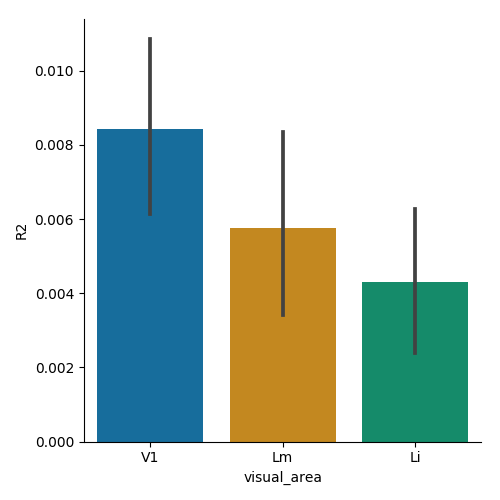

ols_by-session_fit-responses_R2


In [890]:
#pl.figure()

sns.catplot(x='visual_area', y='R2', data=R2_by_session, order=['V1', 'Lm', 'Li'], kind='bar', 
           palette='colorblind')

fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ols_by-session_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s_bar.svg' % figname))
pl.savefig(os.path.join(outdir, '%s_bar.png' % figname))

print(figname)


## Stats?

In [836]:
import statsmodels.stats.multicomp as ml


In [837]:
c1 = R2_by_session[R2_by_session['visual_area']=='V1']['R2']
c2 = R2_by_session[R2_by_session['visual_area']=='Lm']['R2']
c3 = R2_by_session[R2_by_session['visual_area']=='Li']['R2']
print(c1.shape, c2.shape, c3.shape)

# Shapiro-Wilk normality test 
spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) 

# Shapiro-Wilk normality test 
spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) 

F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

((10,), (11,), (11,))
F statistic = 3.314 and probability p = 0.051
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm   -0.0022  -0.0103 0.0059 False 
  Li     V1    0.0062  -0.0021 0.0144 False 
  Lm     V1    0.0084   0.0001 0.0166  True 
--------------------------------------------


#### Collapse all neurons

In [526]:
R2_f.groupby(['visual_area']).mean()

R2      pval
visual_area                    
Li           0.011168  0.189322
Lm           0.006915  0.230240
V1           0.015832  0.128729

In [844]:
R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
R2_f[R2_f['sig']==1].groupby(['visual_area']).mean()

R2      pval  sig
visual_area                         
Li           0.018526  0.006598    1
Lm           0.013481  0.006770    1
V1           0.022863  0.004224    1

<IPython.core.display.Javascript object>


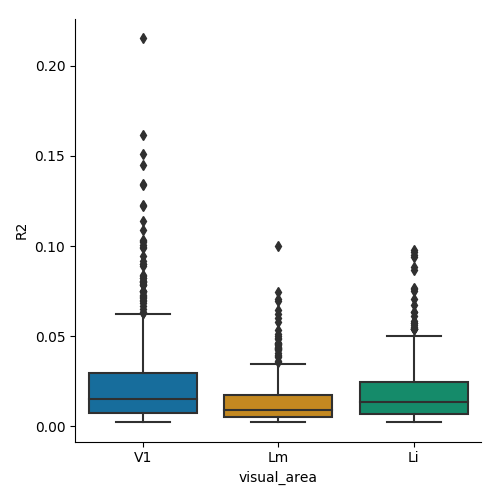

residuals


In [851]:
#fig, ax = pl.subplots(1,2, figsize=(10,4))
sns.catplot(x='visual_area', y='R2', kind='box',
            data=R2_f[R2_f['sig']==1], palette='colorblind', order=['V1', 'Lm', 'Li'],
            #hue='sig',
            height=5, legend_out=False) #ax[0]) #, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel('R2')

#pl.show()

pl.savefig(os.path.join(outdir, 'ols_collapse-sessions_fit-%s_box.png' % fit_str))
print(fit_str)

# Ridge

In [539]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer, quantile_transform
#from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as skmetrics #import median_absolute_error, r2_score



In [531]:
import sklearn
sklearn.__version__

'0.19.1'

In [532]:
datakey

'20190616_JC097_fov1_blobs'

In [305]:
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]

# Split test set
curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
train_x = neuraldf[curr_rois].iloc[0::2]
test_x = neuraldf[curr_rois].iloc[1::2]
train_y = pupildf['pupil'].iloc[0::2]
test_y = pupildf['pupil'].iloc[1::2]

scaler = StandardScaler().fit(train_x.values)


In [307]:
ridge = Ridge(normalize=False)

# Grid search
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
n_folds = None
grid = GridSearchCV(ridge, params, scoring='mean_squared_error') #, 
                          #cv=None, store_cv_values=True)
grid.fit(scaler.transform(train_x), train_y)

# summarize results
#grid_results.append(pd.DataFraem('datakey': datake grid.best_score_)
print(grid.best_estimator_.alpha)

10.0


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

In [533]:
# f_MODELS = {}
# f_R2list = []
grid_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['neural']
    pupildf = DATA[datakey]['pupil']
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)
    
    # Grid search
    params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
    n_folds = None
    ridge = Ridge(normalize=False)
    grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error') #, 
                              #cv=None, store_cv_values=True)
    grid.fit(scaler.transform(train_x), train_y)
    
    grid_results.append(pd.DataFrame({'visual_area': visual_area,
                         'datakey': datakey,
                         'best_alpha': grid.best_estimator_.alpha,
                          'best_mse': grid.best_score_}, index=[di]) )
    
grid_results = pd.concat(grid_results, axis=0)

#     f_MODELS[datakey] = {'data': {'train_x': train_x, 
#                                   'train_y': train_y,
#                                   'test_x': test_x,
#                                   'test_y': test_y},
#                          'grid_results': grid}
                          
    
#     ols, R2 = fit_linear_model_per_roi(pupildf, neuraldf,
                                       
#                                visual_area=visual_area, datakey=datakey,
#                                indepvar_x='pupildiam')
#     f_MODELS[datakey] = ols
#     f_R2list.append(R2)
# R2_f = pd.concat(f_R2list, axis=0)
# R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]


In [534]:
grid_results.groupby(['visual_area']).mean()

best_alpha   best_mse
visual_area                       
Li                 10.0 -37.051330
Lm                 10.0 -18.919736
V1                 10.0 -19.401806

In [535]:
datakey

'20190616_JC097_fov1_blobs'

In [536]:
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]

# Split test set
curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
train_x = neuraldf[curr_rois].iloc[0::2]
test_x = neuraldf[curr_rois].iloc[1::2]
train_y = pupildf['pupil'].iloc[0::2]
test_y = pupildf['pupil'].iloc[1::2]
scaler = StandardScaler().fit(train_x.values)

# Grid search
#params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
#n_folds = None
ridge = RidgeCV(normalize=False, cv=None, store_cv_values=True)
# ridge = TransformedTargetRegressor(
#     regressor=RidgeCV(),
#     transformer=QuantileTransformer(n_quantiles=300,
#                                     output_distribution='normal'))
#regr_trans.fit(X_train, y_train)

ridge.fit(scaler.transform(train_x), train_y)
prediction = ridge.predict(scaler.transform(test_x))
R2_score = ridge.score(scaler.transform(test_x), test_y)
print(R2_score)

0.194060702115


In [434]:
prediction.shape

(749,)

<IPython.core.display.Javascript object>


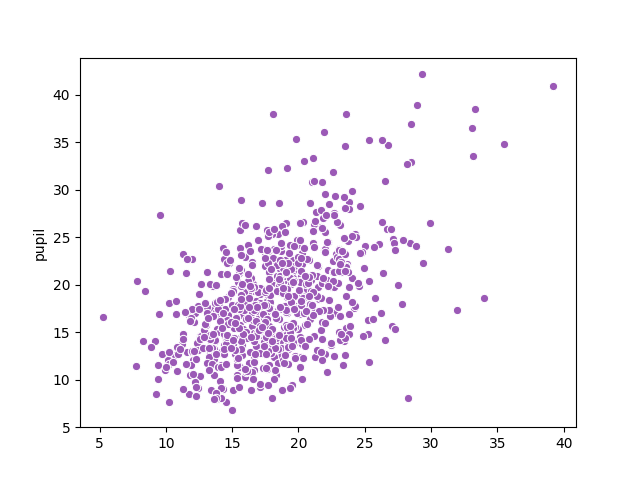

In [435]:
pl.figure()
sns.scatterplot(prediction, test_y)

In [191]:
train_x.shape

(750, 188)

In [877]:
fit_residuals = False

data_type = 'residuals_' if fit_residuals else ''
ridge_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)

    # Grid search
    regr_ridge = RidgeCV(normalize=False, cv=None, store_cv_values=False, gcv_mode='svd')
    regr_ridge.fit(scaler.transform(train_x), train_y)
    prediction = regr_ridge.predict(scaler.transform(test_x))
    R2_score = regr_ridge.score(scaler.transform(test_x), test_y)
    MAE =  skmetrics.median_absolute_error(test_y, prediction)
    #print(R2_score)
    r, pval = spstats.pearsonr(test_y, prediction)
    
    ridge_results.append(pd.DataFrame({'visual_area': visual_area,
                                      'datakey': datakey,
                                       'MAE': MAE,
                                      'R2': R2_score, 
                                       'pearson_r': r,
                                       'p_value': pval}, index=[di]) )
                        
    
ridge_results = pd.concat(ridge_results, axis=0)

In [ ]:
Train ridge regression model for each dataset, then calculate pearson's corr for predicted versus true pupil size. Bars show mean (+/- std) pearson's r of datasets by visual area.

<IPython.core.display.Javascript object>


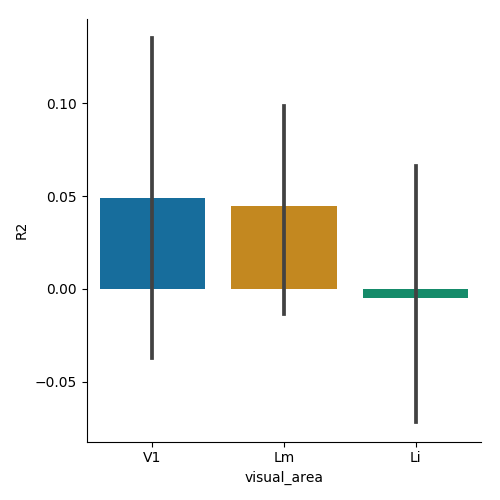

ridge_fit-responses_R2


In [891]:
#fig, ax = pl.subplots()

#R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]
metric = 'R2'

sns.catplot(x='visual_area', y=metric, palette='colorblind', order=['V1', 'Lm', 'Li'], kind='bar', 
           data=ridge_results[ridge_results['p_value']<0.05]) #, 
            #alpha=0.5, height=5, legend_out=False, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel(metric)
#pl.xticks([])
#pl.xlabel('')

#pl.subplots_adjust(right=0.9)
label_figure(fig, datakey)

fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ridge_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s_bar.svg' % figname))
pl.savefig(os.path.join(outdir, '%s_bar.png' % figname))

print(figname)

#### Stats

In [879]:
c1 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='V1')]['R2']
c2 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Lm')]['R2']
c3 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Li')]['R2']
print(c1.shape, c2.shape, c3.shape)

((9,), (7,), (8,))


In [880]:
F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

F statistic = 0.504 and probability p = 0.611
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    0.0497  -0.1066 0.206  False 
  Li     V1    0.0537   -0.093 0.2005 False 
  Lm     V1    0.004   -0.1482 0.1562 False 
--------------------------------------------


<IPython.core.display.Javascript object>


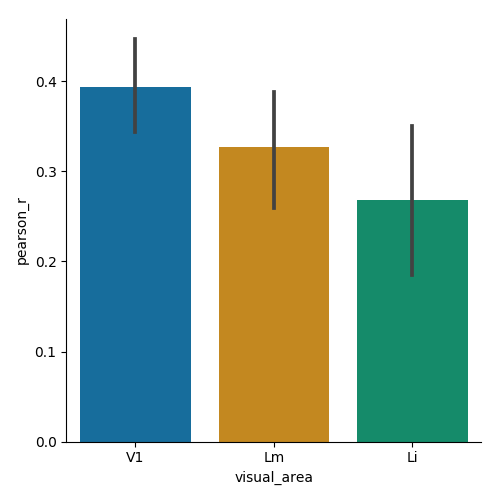

ridge_fit-responses_pearson_r


In [884]:
metric = 'pearson_r'

sns.catplot(x='visual_area', y=metric, palette='colorblind', order=['V1', 'Lm', 'Li'], kind='bar', #['V1', 'Lm', 'Li'],
         data=ridge_results[ridge_results['p_value']<0.01]) #, 

#sns.catplot(x='visual_area', y='R2', data=R2_by_session, order=['V1', 'Lm', 'Li'], kind='bar', 
#           palette='colorblind')
pl.ylabel(metric)
#pl.xticks([])
#pl.xlabel('')


fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ridge_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s_bar.svg' % figname))
pl.savefig(os.path.join(outdir, '%s_bar.png' % figname))
print(figname)

In [885]:
c1 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='V1')]['pearson_r']
c2 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Lm')]['pearson_r']
c3 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Li')]['pearson_r']
print(c1.shape, c2.shape, c3.shape)
F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)


((9,), (7,), (8,))
F statistic = 4.098 and probability p = 0.031
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    0.081   -0.0573 0.2194 False 
  Li     V1    0.1476   0.0177 0.2775  True 
  Lm     V1    0.0665  -0.0682 0.2013 False 
--------------------------------------------


In [862]:
ridge_results.head()

MAE        R2                    datakey       p_value  pearson_r  \
0  2.613698 -0.031679  20190603_JC080_fov1_blobs  5.868247e-16   0.290538   
1  2.953203  0.273875  20190420_JC076_fov1_blobs  4.219522e-50   0.545008   
2  1.655002  0.174962  20190525_JC084_fov1_blobs  2.398629e-39   0.453650   
3  2.314208  0.091428  20190612_JC099_fov1_blobs  3.526848e-25   0.365930   
4  3.589200 -0.130418  20191006_JC110_fov1_blobs  4.863452e-01   0.024269   

  visual_area  
0          Lm  
1          V1  
2          Lm  
3          Li  
4          V1

# Fano Factor

In [241]:
datakey

'20190616_JC097_fov1_blobs'

In [423]:
fano_dfs = []
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
print(neuraldf.shape)
curr_rois = neuraldf.columns.tolist()
for rid in curr_rois:
    fano_factor = np.array([np.var(abs(neuraldf[rid].loc[g.index]), ddof=1) / np.nanmean(abs(neuraldf[rid].loc[g.index])) \
                     for cfg, g in pupildf.groupby(['config'])])

    response_mag = np.array([np.nanmean(abs(neuraldf[rid].loc[g.index])) for cfg, g in pupildf.groupby(['config'])])
    #print(response_mag.shape, fano_factor.shape)
    
    fdf = pd.DataFrame({'fano_factor': fano_factor,
                        'response_mag': response_mag,
                        'rid': [rid for _ in np.arange(0, len(fano_factor))]})
    fano_dfs.append(fdf)

(1499, 188)


In [424]:
fano_df = pd.concat(fano_dfs, axis=0)

In [558]:
nrois = len(fano_df['rid'].unique())
colorlist = sns.color_palette('cubehelix', n_colors = nrois)
roi_colors = dict((r, col) for r, col in zip(fano_df['rid'].unique(), colorlist))

In [562]:
sorted_ixs = np.argsort(g['response_mag'])



<IPython.core.display.Javascript object>


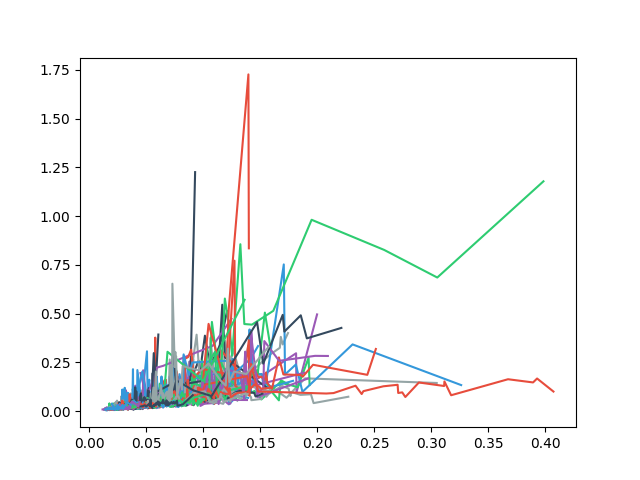

In [567]:
pl.figure()
for rid, g in fano_df.groupby(['rid']):
    sorted_ixs = np.argsort(g['response_mag'])
    pl.plot(g['response_mag'][sorted_ixs], g['fano_factor'][sorted_ixs]) #, color=roi_colors[rid])
#sns.scatterplot(x='response_mag', y='fano_factor', hue='rid', palette='hsv', data=fano_df)

In [421]:
g.shape

(50, 3)

In [367]:
neuraldf.shape

(1499, 188)

In [342]:
fanos = []
for cfg, g in pupildf.groupby(['config']):
    ff_pupil = [float( np.var(g['pupil'], ddof=1) / np.nanmean(g[['pupil']]) ) \
                for cfg, g in pupildf.groupby(['config'])]
    
    ff_neural = [np.var(abs(neuraldf[rid].loc[g.index]), ddof=1) / np.nanmean(abs(neuraldf[rid].loc[g.index]))\
                 for cfg, g in pupildf.groupby(['config'])]
    
    nrois = len(ff_neural)
    fanos.append( pd.DataFrame({'config': [cfg for _ in np.arange(nrois)],
                  'ff_pupil': [ff_pupil for _ in np.arange(nrois)],
                  'ff_neural': ff_neural,
                  'roi': neuraldf.columns.tolist()}) )
    
fanos = pd.concat(fanos, axis=0)

In [374]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
#for di, datakey in enumerate(DATA.keys()):
neuraldf = DATA[datakey]['%sneural' % data_type]
pupildf = DATA[datakey]['%spupil' % data_type]
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]


<IPython.core.display.Javascript object>


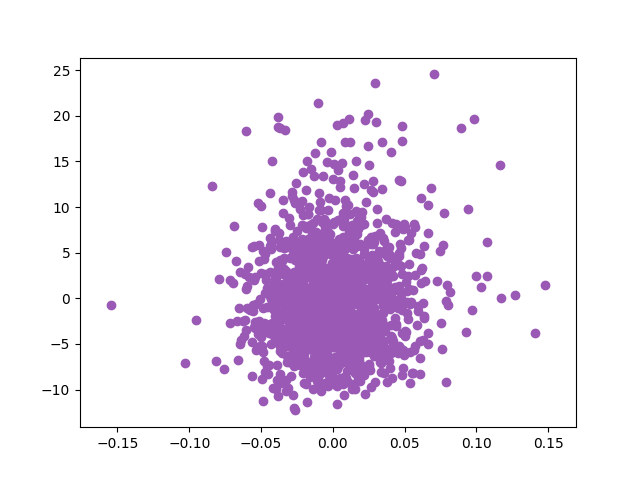

In [379]:
pl.figure()
pl.scatter(neuraldf[rid], pupildf['pupil'])


In [389]:
print(rid)
ff_pupil = float( np.var(abs(pupildf['pupil']), ddof=1) / np.nanmean(abs(pupildf['pupil'])) )

ff_neural = float( np.var(abs(neuraldf[rid]), ddof=1) / np.nanmean(abs(neuraldf[rid])) )

print(rid, ff_pupil, ff_neural)

431
(431, 2.853716963408797, 0.016341970374077086)


In [390]:
curr_rois = neuraldf.columns.tolist()
ff_neurals = [float( np.var(abs(neuraldf[rid]), ddof=1) / np.nanmean(abs(neuraldf[rid])) ) \
 for rid in curr_rois]


<IPython.core.display.Javascript object>


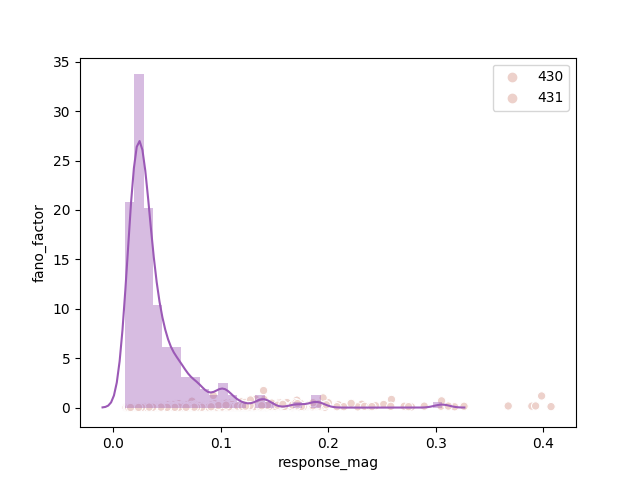

In [392]:
pl.figure()
sns.distplot(ff_neurals)

In [373]:
len(ff_pupil), len(ff_neural)

(50, 50)

In [353]:
ff_neural

ff_neural  ff_pupil
roi config                        
90  config001   0.021902  1.651433
    config002   0.020529  1.284894
    config003   0.019403  1.800445
    config004   0.018906  2.473949
    config005   0.016051  0.968366
    config006   0.031666  1.246181
    config007   0.060472  1.829322
    config008   0.039056  1.549972
    config009   0.058407  2.145511
    config010   0.021684  1.387653
    config011   0.064109  1.622180
    config012   0.071483  1.183094
    config013   0.047775  1.329624
    config014   0.049043  1.364685
    config015   0.043814  1.692130
    config016   0.047894  1.307047
    config017   0.083515  1.820424
    config018   0.092135  1.629192
    config019   0.043616  1.069145
    config020   0.031477  2.188173
    config021   0.065968  1.447792
    config022   0.071349  2.078376
    config023   0.075133  1.539280
    config024   0.090707  4.287219
    config025   0.028993  1.470476
    config026   0.063267  1.570605
    config027   0.077263  1.255422
    config028   0.093379  2.061260
    config029   0.096978  1.316704
    config030   0.030043  1.603102
    config031   0.040861  1.840564
    config032   0.053224  0.983299
    config033   0.057630  2.965408
    config034   0.060198  2.820902
    config035   0.049017  1.900978
    config036   0.046137  1.550385
    config037   0.037928  1.662427
    config038   0.075614  1.649709
    config039   0.077097  0.819739
    config040   0.044265  1.964044
    config041   0.052288  2.448013
    config042   0.057330  2.141988
    config043   0.059148  1.629000
    config044   0.058845  1.756102
    config045   0.087468  1.014411
    config046   0.099958  2.390653
    config047   0.056967  2.123924
    config048   0.038620  2.213379
    config049   0.125657  0.807814
    config050   0.073348  1.289718

In [345]:
np.var(abs(neuraldf[90].loc[g.index])) / abs(neuraldf[90].loc[g.index]).mean()

0.070903083787223153

<IPython.core.display.Javascript object>


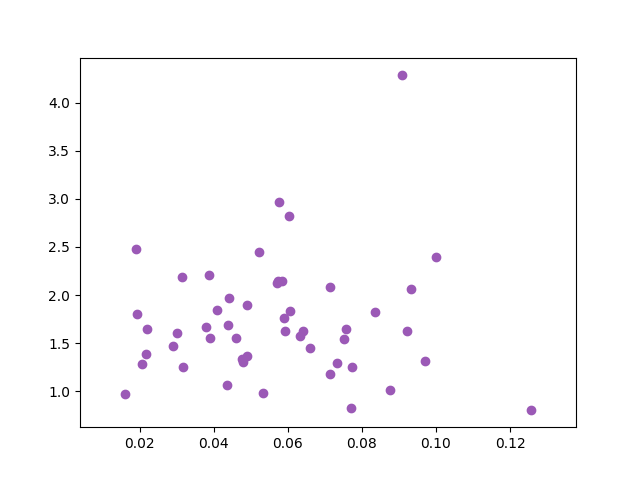

(0.047842244664200118, 0.74145414169491475)


In [355]:
pl.figure()
pl.scatter(avgs['ff_neural'].values, avgs['ff_pupil'].values)

pearson_r, p_value = spstats.pearsonr(avgs['ff_neural'].values, avgs['ff_pupil'].values)
print(pearson_r, p_value)

In [ ]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
ridge_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)

    # Grid search
    regr_ridge = RidgeCV(normalize=False, cv=5, store_cv_values=False, gcv_mode='svd')
    regr_ridge.fit(scaler.transform(train_x), train_y)
    prediction = regr_ridge.predict(scaler.transform(test_x))
    R2_score = regr_ridge.score(scaler.transform(test_x), test_y)
    #print(R2_score)
    r, pval = spstats.pearsonr(test_y, prediction)
    
    ridge_results.append(pd.DataFrame({'visual_area': visual_area,
                                      'datakey': datakey,
                                      'R2': R2_score, 
                                       'pearson_r': r,
                                       'p_value': pval}, index=[di]) )
                        
    
ridge_results = pd.concat(ridge_results, axis=0)

In [222]:
DATA[datakey].keys()

['residuals_pupil', 'pupil', 'residuals_neural', 'neural']

<IPython.core.display.Javascript object>


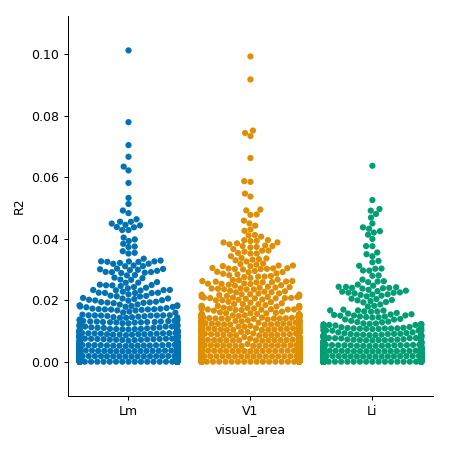

In [704]:
#fig, ax = pl.subplots()

R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

sns.catplot(x='visual_area', y='R2', kind='swarm', palette='colorblind', #hue='sig', 
            data=R2_f) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
#pl.xticks([])
#pl.xlabel('')

label_figure(fig, datakey)

# Filter

# Get eyetracker acquisition info

# Get pupil residuals

In [649]:
residuals_pupil = pupilstats.copy()
for c, g in pupilstats.groupby(['config']):
    residuals_pupil['pupil'][g.index] = pupilstats.loc[g.index]['pupil'] - pupilstats.loc[g.index]['pupil'].mean()

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [555]:
plot_residuals = False

if plot_residuals:
    fig, ax = pl.subplots() #pl.figure()
    for c, g in residuals_pupil.groupby(['config']):
        ax.plot(g['pupil'].dropna(), alpha=0.5)


In [554]:
# for config, g in trial_key.groupby(['config']):
#    print(g.shape)

# Get neural responses and residuals

In [561]:
R2_all[R2_all['datakey']==datakey].shape

(141, 5)

In [608]:
residuals_neural = DATA[datakey]['residuals_neural']
residuals_pupil = DATA[datakey]['residuals_pupil']
responsive_cells = residuals_neural.columns.tolist()
print(len(responsive_cells))

141


In [609]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']

In [610]:
residuals_pupil.head()

config     pupil  trial
0  config025  2.946112    1.0
1  config024 -0.233637    2.0
2  config046 -1.472992    3.0
3  config013  0.046228    4.0
4  config002 -2.872295    5.0

In [611]:
residuals_neural.shape

(1582, 141)

In [641]:
#dropped_ = np.where(np.isnan(pupil_values))[0]
#keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])

dropped_ = [i for i in pupil_values.index.tolist() if np.isnan(i)]
keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

print("N Nans:", len(dropped_))
print("N keep:", len(keep_))


('N Nans:', 0)
('N keep:', 1582)


In [642]:
dropped_ixs = np.where(np.isnan(pupil_values))[0]
dropped_trs = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])

keep_ixs = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
keep_trs = np.array([i for i in pupil_values.index.tolist() if i not in dropped_trs])


In [644]:
#xdf = residuals_neural.iloc[keep_].copy()
xdf = residuals_neural.loc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()


In [651]:
residuals_neural.shape

(1582, 141)

In [650]:
max(keep_)

1581

In [645]:
xdf.head()

0         1         4         6         7        13        22  \
0  0.536666 -0.242237  0.276863  0.552535 -0.051407 -0.180313  0.003977   
1  0.359389  0.034676 -0.091373  0.006093 -0.074069 -0.110579 -0.027672   
2 -0.356232  0.131639 -0.154972 -0.075936 -0.060184  0.038357  0.067955   
3  1.019509 -0.061945  0.136980  0.186179  0.018295 -0.042643 -0.115071   
4 -0.061467  0.015477 -0.027016 -0.111911 -0.088562  0.122120  0.099153   

         24        25        27    ...           254       258       259  \
0 -0.036779  0.138382  0.464793    ...      0.400809  0.327629  0.320027   
1 -0.039527 -0.088495  0.060424    ...      0.006097  0.355125 -0.053250   
2 -0.084018 -0.003566  0.101943    ...     -0.131290  0.047555 -0.027075   
3  0.257502  0.154710  0.168349    ...      0.008972  0.106587  0.125058   
4 -0.011372  0.211735  0.002475    ...     -0.025114 -0.040375  0.070321   

        260       261       264       265       269       270  pupildiam  
0  0.479045  0.832553 -0.082252  0.327724  0.164935 -0.010489   2.946112  
1 -0.151231 -0.093623  0.219817 -0.002453  0.077677 -0.022610  -0.233637  
2  0.033762 -0.081263 -0.079244 -0.027671  0.312830  0.123184  -1.472992  
3 -0.012447  0.229084 -0.010587  0.068795  0.032344 -0.049751   0.046228  
4  0.098636 -0.037986  0.127006  0.149954 -0.235430  0.014719  -2.872295  

[5 rows x 142 columns]

In [646]:
ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
    modelfit = model.fit()
    #p = modelfit.params
    #modelfit.rquared

    ols[rid] = modelfit


In [647]:

R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                   'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                   'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})

In [648]:
model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
modelfit = model.fit()
modelfit.params

const       NaN
pupildiam   NaN
dtype: float64

In [640]:
R2

R2                    datakey      pval visual_area
0    6.926331e-05  20190605_JC090_fov1_blobs  0.740822          V1
1    2.914088e-03  20190605_JC090_fov1_blobs  0.031795          V1
2    9.989896e-04  20190605_JC090_fov1_blobs  0.208949          V1
3    4.066685e-05  20190605_JC090_fov1_blobs  0.799924          V1
4    6.107157e-03  20190605_JC090_fov1_blobs  0.001867          V1
5    9.266029e-04  20190605_JC090_fov1_blobs  0.226255          V1
6    1.496540e-05  20190605_JC090_fov1_blobs  0.877810          V1
7    2.802830e-04  20190605_JC090_fov1_blobs  0.505789          V1
8    1.006246e-03  20190605_JC090_fov1_blobs  0.207302          V1
9    1.675616e-04  20190605_JC090_fov1_blobs  0.606919          V1
10   1.007033e-06  20190605_JC090_fov1_blobs  0.968187          V1
11   3.092700e-05  20190605_JC090_fov1_blobs  0.825077          V1
12   1.784242e-04  20190605_JC090_fov1_blobs  0.595494          V1
13   1.642839e-04  20190605_JC090_fov1_blobs  0.610459          V1
14   3.122885e-03  20190605_JC090_fov1_blobs  0.026237          V1
15   4.463822e-04  20190605_JC090_fov1_blobs  0.401036          V1
16   1.868385e-04  20190605_JC090_fov1_blobs  0.586946          V1
17   2.130309e-06  20190605_JC090_fov1_blobs  0.953743          V1
18   1.687747e-05  20190605_JC090_fov1_blobs  0.870303          V1
19   1.162727e-03  20190605_JC090_fov1_blobs  0.175233          V1
20   4.644560e-04  20190605_JC090_fov1_blobs  0.391661          V1
21   5.796077e-07  20190605_JC090_fov1_blobs  0.975862          V1
22   6.327365e-03  20190605_JC090_fov1_blobs  0.001544          V1
23   1.640784e-03  20190605_JC090_fov1_blobs  0.107286          V1
24   7.058357e-04  20190605_JC090_fov1_blobs  0.290941          V1
25   1.919080e-04  20190605_JC090_fov1_blobs  0.581916          V1
26   7.094030e-04  20190605_JC090_fov1_blobs  0.289725          V1
27   7.989020e-06  20190605_JC090_fov1_blobs  0.910559          V1
28   1.800788e-06  20190605_JC090_fov1_blobs  0.957467          V1
29   2.383724e-04  20190605_JC090_fov1_blobs  0.539453          V1
..            ...                        ...       ...         ...
111  1.327643e-03  20190605_JC090_fov1_blobs  0.147453          V1
112  6.482236e-04  20190605_JC090_fov1_blobs  0.311525          V1
113  9.141153e-04  20190605_JC090_fov1_blobs  0.229412          V1
114  4.295371e-05  20190605_JC090_fov1_blobs  0.794498          V1
115  4.401771e-04  20190605_JC090_fov1_blobs  0.404329          V1
116  1.363014e-02  20190605_JC090_fov1_blobs  0.000003          V1
117  5.090282e-03  20190605_JC090_fov1_blobs  0.004524          V1
118  1.470667e-05  20190605_JC090_fov1_blobs  0.878862          V1
119  2.783511e-05  20190605_JC090_fov1_blobs  0.833917          V1
120  1.447768e-04  20190605_JC090_fov1_blobs  0.632496          V1
121  1.613095e-04  20190605_JC090_fov1_blobs  0.613709          V1
122  5.810567e-03  20190605_JC090_fov1_blobs  0.002414          V1
123  2.221458e-04  20190605_JC090_fov1_blobs  0.553594          V1
124  6.265142e-04  20190605_JC090_fov1_blobs  0.319769          V1
125  1.067050e-06  20190605_JC090_fov1_blobs  0.967253          V1
126  1.461506e-07  20190605_JC090_fov1_blobs  0.987878          V1
127  2.063966e-04  20190605_JC090_fov1_blobs  0.568002          V1
128  5.212958e-04  20190605_JC090_fov1_blobs  0.364129          V1
129  2.255283e-03  20190605_JC090_fov1_blobs  0.058966          V1
130  1.107018e-05  20190605_JC090_fov1_blobs  0.894800          V1
131  9.227109e-07  20190605_JC090_fov1_blobs  0.969547          V1
132  8.380753e-04  20190605_JC090_fov1_blobs  0.249823          V1
133  6.579052e-04  20190605_JC090_fov1_blobs  0.307937          V1
134  2.753761e-05  20190605_JC090_fov1_blobs  0.834794          V1
135  2.757179e-04  20190605_JC090_fov1_blobs  0.509275          V1
136  4.770073e-04  20190605_JC090_fov1_blobs  0.385335          V1
137  3.457827e-06  20190605_JC090_fov1_blobs  0.941088          V1
138  3.170901e-05  20190605_JC090_fov1_blobs  0.822915        

In [551]:
# Get nrois x ntrials array
roi_responses = pd.DataFrame(np.vstack([exp.data.traces.iloc[g.index].mean(axis=0)\
                                    for trial, g in labels.groupby(['trial'])]))

# Get responsive cells
responsive_cells, ncells_total = exp.get_responsive_cells(response_type='dff',\
                                                          responsive_test='ROC', responsive_thr=0.05)
print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
neuraldata = roi_responses[responsive_cells]


In [559]:
trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                    for trial, g in labels.groupby(['trial'])]), columns=['config'])

config
0     config032
1     config031
2     config021
3     config020
4     config003
5     config043
6     config034
7     config005
8     config012
9     config009
10    config033
11    config008
12    config042
13    config044
14    config015
15    config017
16    config023
17    config013
18    config006
19    config024
20    config050
21    config002
22    config016
23    config039
24    config018
25    config019
26    config001
27    config014
28    config046
29    config029
...         ...
1470  config021
1471  config034
1472  config016
1473  config001
1474  config044
1475  config022
1476  config009
1477  config026
1478  config043
1479  config045
1480  config005
1481  config020
1482  config018
1483  config049
1484  config015
1485  config037
1486  config007
1487  config031
1488  config046
1489  config013
1490  config028
1491  config027
1492  config019
1493  config003
1494  config050
1495  config035
1496  config039
1497  config030
1498  config004
1499  config041

[1500 rows x 1 columns]

In [604]:
residuals_neural = neuraldata.copy()

for c, g in trial_configs.groupby(['config']):
    residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

In [606]:
ols, R2 = fit_linear_model(residuals_pupil, residuals_neural)


In [607]:
datakey, R2

('20190605_JC090_fov1_blobs',
                R2                    datakey      pval visual_area
 0    6.926331e-05  20190605_JC090_fov1_blobs  0.740822          V1
 1    2.914088e-03  20190605_JC090_fov1_blobs  0.031795          V1
 2    9.989896e-04  20190605_JC090_fov1_blobs  0.208949          V1
 3    4.066685e-05  20190605_JC090_fov1_blobs  0.799924          V1
 4    6.107157e-03  20190605_JC090_fov1_blobs  0.001867          V1
 5    9.266029e-04  20190605_JC090_fov1_blobs  0.226255          V1
 6    1.496540e-05  20190605_JC090_fov1_blobs  0.877810          V1
 7    2.802830e-04  20190605_JC090_fov1_blobs  0.505789          V1
 8    1.006246e-03  20190605_JC090_fov1_blobs  0.207302          V1
 9    1.675616e-04  20190605_JC090_fov1_blobs  0.606919          V1
 10   1.007033e-06  20190605_JC090_fov1_blobs  0.968187          V1
 11   3.092700e-05  20190605_JC090_fov1_blobs  0.825077          V1
 12   1.784242e-04  20190605_JC090_fov1_blobs  0.595494          V1
 13   1.642839e-04

# Regression on residuals

In [48]:
import statsmodels.api as sm
from pipeline.python.utils import label_figure

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [598]:
%matplotlib notebook

In [659]:
residuals_neural.shape

(1500, 100)

In [660]:
residuals_pupil.shape

(1500, 3)

In [661]:
residuals_pupil.head()

config     pupil  trial
0  config032  9.269252      1
1  config031  4.447400      2
2  config021  9.180851      3
3  config020  6.928909      4
4  config003  1.817075      5

In [664]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
dropped_ = np.where(np.isnan(pupil_values))[0]
keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])


In [676]:
# Look for 1 cell
neural_values = residuals_neural[responsive_cells[0]]

X = pupil_values[keep_].copy()
y = neural_values[keep_].copy()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.945
Date:                Sun, 09 Feb 2020   Prob (F-statistic):             0.0263
Time:                        22:25:16   Log-Likelihood:                 2288.8
No. Observations:                1471   AIC:                            -4574.
Df Residuals:                    1469   BIC:                            -4563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.100      0.9

In [678]:
xdf = residuals_neural.iloc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()

In [667]:

ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
    modelfit = model.fit()
    p = modelfit.params

    ols[rid] = modelfit


In [686]:
fig.get_facecolor()


(1.0, 1.0, 1.0, 0)

<IPython.core.display.Javascript object>


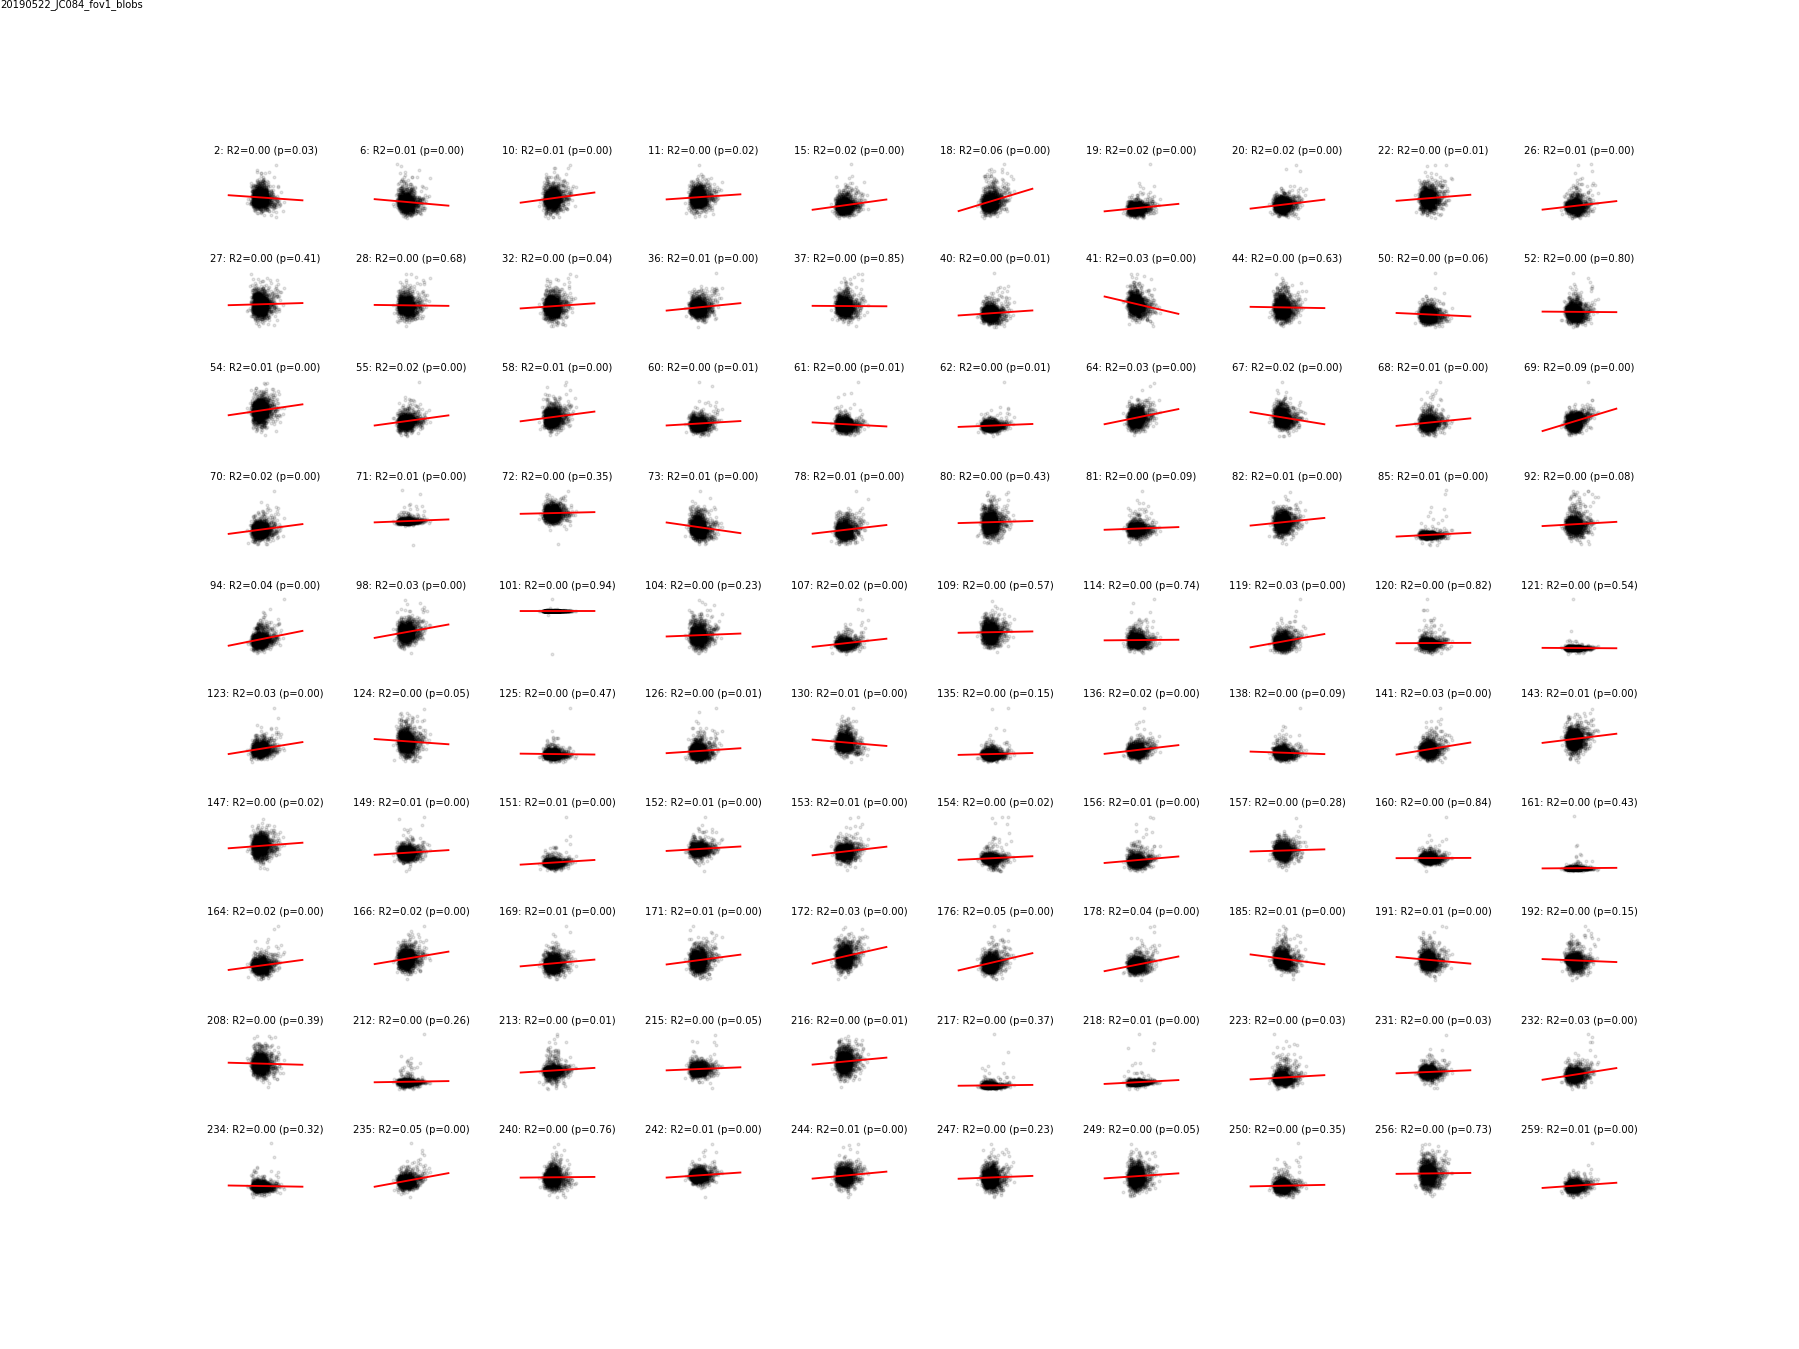

In [695]:
nr = 10
nc = 10

ai = 0
fig, axes = pl.subplots(nr, nc, figsize=(nc*2, nr*1.5))
fig.patch.set_alpha(1)

for rid in responsive_cells:
    ax = axes.flat[ai]
    roi_index = list(responsive_cells).index(rid)
    
    # scatter-plot data
    ax = xdf.plot(x=indepvar_x, y=rid, kind='scatter', alpha=0.1, s=5, c='k', ax=ax)
    #ax.scatter(x_test, y_test,  color='black', alpha=0.5, s=5)

    # generate x-values for your regression line (two is sufficient)
    vmin = xdf[indepvar_x].min()
    vmax = xdf[indepvar_x].max()
    vrange = vmax - vmin
    x = np.linspace(vmin-vrange*.5, vmax+vrange*.5, 3)

    # plot regression line on the same axes, set x-axis limits
    p = ols[rid].params
    ax.plot(x, p.const + p[indepvar_x] * x, color='r')
    #ax.set_xlim([1, 2])

    #modelfit.summary()

    statstr = 'R2=%.2f (p=%.2f)' % (ols[rid].rsquared, ols[rid].f_pvalue)
    #ax.set_title(statstr)

    ax.set_title('%i: %s' % (int(rid+1), statstr), fontsize=8)
    ax.axis('off')

    ai += 1
    
pl.subplots_adjust(hspace=0.8, wspace=0.8)
label_figure(fig, datakey)

[513,
 518,
 519,
 11,
 15,
 530,
 19,
 20,
 22,
 24,
 26,
 28,
 31,
 32,
 34,
 42,
 43,
 48,
 50,
 51,
 54,
 55,
 58,
 59,
 60,
 62,
 65,
 66,
 523,
 69,
 72,
 74,
 75,
 76,
 77,
 85,
 109,
 531,
 126,
 134,
 135,
 137,
 138,
 166,
 169,
 176,
 187,
 196,
 205,
 206,
 209,
 211,
 219,
 234,
 235,
 242,
 243,
 248,
 249,
 251,
 252,
 255,
 256,
 257,
 261,
 266,
 267,
 270,
 272,
 277,
 303,
 304,
 305,
 311,
 316,
 317,
 322,
 326,
 327,
 331,
 332,
 333,
 334,
 341,
 343,
 354,
 362,
 370,
 376,
 378,
 382,
 383,
 387,
 396,
 399,
 401,
 404,
 409,
 414,
 417,
 418,
 429,
 438,
 441,
 447,
 448,
 449,
 453,
 455,
 456,
 457,
 458,
 459,
 464,
 484,
 495,
 496,
 497,
 498,
 499,
 510,
 511]

In [790]:
responsive_cells = ols.keys()
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


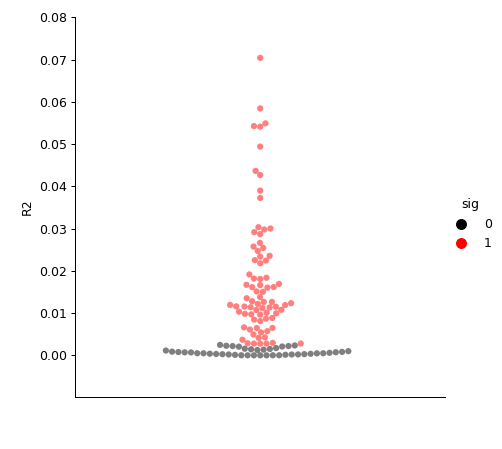

In [791]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)

# Distribution of R2

In [702]:
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]

In [711]:
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


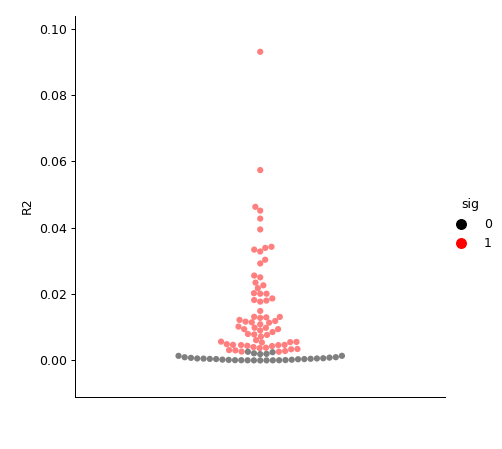

In [716]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)



<IPython.core.display.Javascript object>


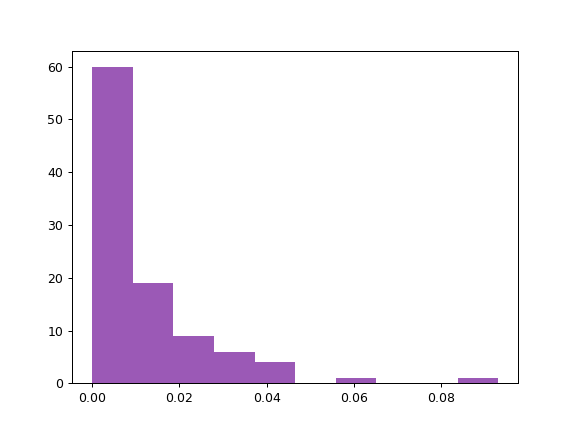

(array([ 60.,  19.,   9.,   6.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([  4.17311769e-06,   9.31060022e-03,   1.86170273e-02,
          2.79234544e-02,   3.72298815e-02,   4.65363086e-02,
          5.58427357e-02,   6.51491628e-02,   7.44555899e-02,
          8.37620170e-02,   9.30684441e-02]),
 <a list of 10 Patch objects>)

In [717]:
pl.figure()
pl.hist(R2['R2'])